# Northwind Marketing Tactics and Strategies

# Applying the 4Ps of marketing 

* R. Mih 
* Cohort ft-ds-100719
* Instructor:  James Irving



## Objective

### Use statistical data to determine the best way to position discounts to improve business outcomes
### Following the "4Ps"  (Product, Price, Position, Placement) of Marketing
* Reference: https://www.singlegrain.com/marketing/the-4-ps-of-marketing-are-they-still-relevant-today-price-product-promotion-place/

<img src='The 4 Ps of marketing.png' width=60%/>

<img src='quote.png' width=60%/>

##  Contents

### ETL and ERD

### Hypotheses

#### 1. Does the discount have a statistically significant effect on the order quantity?
        If yes, at what level(s) of discount

#### 2. Does the discount have a statistically significant effect on the customer product spend (product sales

#### 3. What's the best approach for pricing,  in a competitive environment

#### 4. Does a lower MSRP have a statistically significant effect on the order quantity and product spend (product sales)?

#### 5. Does the Net Discount have a statistically significant effect on order quantity and product spend (product sales)?

In [1]:
#!pip install -U fsds_100719
from fsds_100719.imports import *

fsds_1007219  v0.5.11 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


In [2]:
import pandas as pd
import sqlite3
import numpy as np
from scipy import stats
import statsmodels.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stat
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sms

sns.set_style('whitegrid')
pd.set_eng_float_format(accuracy=3, use_eng_prefix=True)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Set pandas options
pd.set_option('display.precision',3)
pd.set_option('display.max_columns',0)

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

conn = sqlite3.connect('Northwind_small.sqlite')
cur = conn.cursor()

# Set Constants

alpha = 0.05

<div>
<img src="Northwind_ERD_updated.png" width="1000"/>
</div

In [3]:
# Local Functions to be used

def load_data(select_text, disp_rows =5):
    try:
        cur.execute(select_text)
        new_df = pd.DataFrame(cur.fetchall())
        new_df.columns = [x[0] for x in cur.description]
        print("Size of the dataframe = ", new_df.shape)
        print("Number of null data")
        print(new_df.isnull().sum())
        print("Number of duplicated data = ", new_df.duplicated().sum())
        display(new_df.head(disp_rows))
        return new_df
    except:
        print("Table not loaded")
    


# ETL Methodology 

#### Inspect each table and confirm the ERD is correct wrt the column names
#### Inspect the data in each table
    A.  Review the size of the dataframe
    B.  Inspect for null and duplicated data
#### For larger tables, inspect the distribution of data in each column using value_counts()
#### Summarize the data

# Product Table
#### There are 77 products

In [4]:
# Product Table
select_text = 'SELECT * FROM Product;'
product_df = load_data(select_text)

Size of the dataframe =  (77, 10)
Number of null data
Id                 0
ProductName        0
SupplierId         0
CategoryId         0
QuantityPerUnit    0
UnitPrice          0
UnitsInStock       0
UnitsOnOrder       0
ReorderLevel       0
Discontinued       0
dtype: int64
Number of duplicated data =  0


,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.000,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.000,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.000,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.000,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.350,0,0,0,1


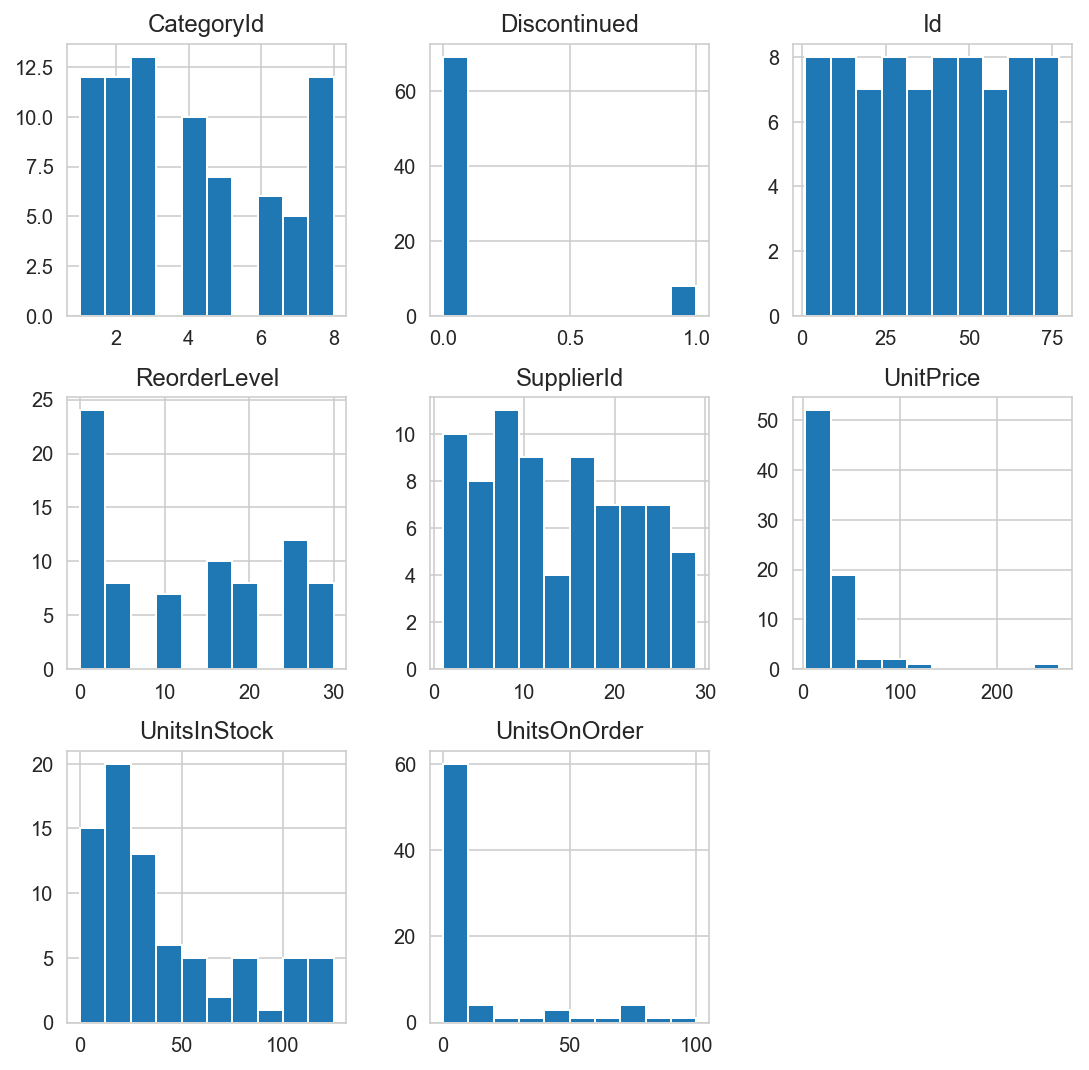

In [5]:
ax = product_df.hist(figsize=(9,9))

In [6]:
## Our goal is a marketing report rather than an operations report,  so removing columns regarding stock and reorders
product_df.drop(columns = ['UnitsInStock', 'UnitsOnOrder', 'ReorderLevel', 'Discontinued' ], inplace=True)

# Supplier Table
#### There are 29 suppliers

In [7]:
select_text = 'SELECT * FROM Supplier;'
supplier_df = load_data(select_text)

Size of the dataframe =  (29, 12)
Number of null data
Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       0
Country          0
Phone            0
Fax             16
HomePage        24
dtype: int64
Number of duplicated data =  0


,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,British Isles,EC1 4SD,UK,(171) 555-2222,None,None
1,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,North America,70117,USA,(100) 555-4822,None,#CAJUN.HTM#
2,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,North America,48104,USA,(313) 555-5735,(313) 555-3349,None
3,4,Tokyo Traders,Yoshi Nagase,Marketing Manager,9-8 Sekimai Musashino-shi,Tokyo,Eastern Asia,100,Japan,(03) 3555-5011,None,None
4,5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Export Administrator,Calle del Rosal 4,Oviedo,Southern Europe,33007,Spain,(98) 598 76 54,None,None


# Region Table
#### 4 Regions (East, West, North, South)

In [8]:
select_data = 'SELECT * FROM Region;'
region_df = load_data(select_data)

Size of the dataframe =  (4, 2)
Number of null data
Id                   0
RegionDescription    0
dtype: int64
Number of duplicated data =  0


,Id,RegionDescription
0,1,Eastern
1,2,Western
2,3,Northern
3,4,Southern


# Category Table

##### 8 Categories of edible goods


In [9]:
select_data = 'SELECT * FROM Category;'
category_df = load_data(select_data)

Size of the dataframe =  (8, 3)
Number of null data
Id              0
CategoryName    0
Description     0
dtype: int64
Number of duplicated data =  0


,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"


# Order Detail Table
#####  One of the largest tables

#####  2155 Products Sold


In [10]:
select_data = 'SELECT * FROM OrderDetail;'
orderdetail_df = load_data(select_data)

Size of the dataframe =  (2155, 6)
Number of null data
Id           0
OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64
Number of duplicated data =  0


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.000,12,0.000
1,10248/42,10248,42,9.800,10,0.000
2,10248/72,10248,72,34.800,5,0.000
3,10249/14,10249,14,18.600,9,0.000
4,10249/51,10249,51,42.400,40,0.000


#### Value Counts for Order Detail

#### Display distribution of prices and discounts

In [11]:
for col in orderdetail_df.columns:
    print(col, '\n', orderdetail_df[col].value_counts().head(2200), '\n')
    #orderdetail_df[col].value_counts().plot(kind='bar', figsize=(3,3));

Id 
 10389/55    1
10716/21    1
10605/71    1
10636/4     1
11021/51    1
10564/31    1
10742/3     1
10835/77    1
10792/2     1
10814/41    1
10743/46    1
10756/68    1
10840/39    1
10632/2     1
10459/46    1
10700/34    1
10802/62    1
10380/70    1
10671/16    1
10774/66    1
10888/68    1
10265/70    1
10400/49    1
10871/16    1
10563/52    1
10688/28    1
10701/71    1
10719/18    1
10302/43    1
10570/56    1
           ..
10857/26    1
10662/68    1
10731/51    1
10938/43    1
11030/59    1
10385/7     1
10278/59    1
10929/21    1
10944/44    1
10766/2     1
11017/70    1
10430/59    1
10806/74    1
10997/32    1
10819/75    1
10927/20    1
10690/77    1
10748/56    1
10745/72    1
10957/64    1
10781/56    1
10360/38    1
10618/68    1
10552/69    1
11049/12    1
10679/59    1
10810/70    1
10345/42    1
10488/73    1
10845/42    1
Name: Id, Length: 2155, dtype: int64 

OrderId 
 11077    25
10657     6
10979     6
10847     6
10861     5
10558     5
11031     5
11021   

#### Feature engineering.  

#### We want to manipulate the data to compare populations with and without discounts shown in the OrderDetail
#### Add a categorical column  called "Discounts" for discounts vs no discounts
#### Add a Final Price column
#### Add a total product spend column
#### Plot a histogram of the data for visual inspection
    * >800 products were discounted, with the ranges of discounts from 5%-25%
    * Bins for significant discounts looks like 5,10,15,20,25

In [12]:
orderdetail_df['Discounts'] = np.where(orderdetail_df['Discount'] == 0,0,1)
orderdetail_df['Final Price'] = orderdetail_df['UnitPrice'] * (1 - orderdetail_df['Discount'])
orderdetail_df['Total Product Spend ($)'] = orderdetail_df['Final Price'] * orderdetail_df['Quantity']
orderdetail_df.head(20)

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,Discounts,Final Price,Total Product Spend ($)
0,10248/11,10248,11,14.000,12,0.000,0,14.000,168.000
1,10248/42,10248,42,9.800,10,0.000,0,9.800,98.000
2,10248/72,10248,72,34.800,5,0.000,0,34.800,174.000
3,10249/14,10249,14,18.600,9,0.000,0,18.600,167.400
4,10249/51,10249,51,42.400,40,0.000,0,42.400,1.696k
5,10250/41,10250,41,7.700,10,0.000,0,7.700,77.000
6,10250/51,10250,51,42.400,35,150.000m,1,36.040,1.261k
7,10250/65,10250,65,16.800,15,150.000m,1,14.280,214.200
8,10251/22,10251,22,16.800,6,50.000m,1,15.960,95.760
9,10251/57,10251,57,15.600,15,50.000m,1,14.820,222.300


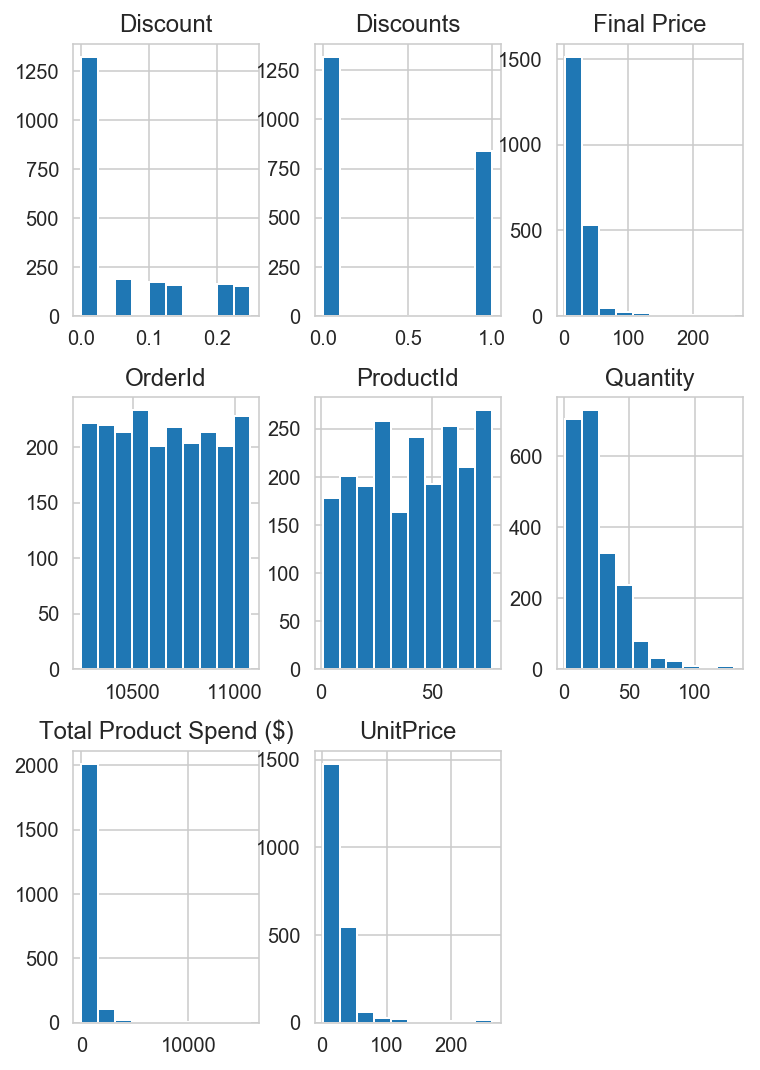

In [13]:
ax = orderdetail_df.hist(figsize=(6,9))

# Employees Table
####  9 Employees


In [14]:
select_data = 'SELECT * FROM Employee;'
Employee_df = load_data(select_data)

Size of the dataframe =  (9, 18)
Number of null data
Id                 0
LastName           0
FirstName          0
Title              0
TitleOfCourtesy    0
BirthDate          0
HireDate           0
Address            0
City               0
Region             0
PostalCode         0
Country            0
HomePhone          0
Extension          0
Photo              9
Notes              0
ReportsTo          1
PhotoPath          0
dtype: int64
Number of duplicated data =  0


,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.000,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.000,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1969-09-19,2025-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2.000,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,2.000,http://accweb/emmployees/buchanan.bmp


# Employee Territory Table

In [15]:
select_data = 'SELECT * FROM EmployeeTerritory;'
employee_territory_df = load_data(select_data)

Size of the dataframe =  (49, 3)
Number of null data
Id             0
EmployeeId     0
TerritoryId    0
dtype: int64
Number of duplicated data =  0


,Id,EmployeeId,TerritoryId
0,1/06897,1,06897
1,1/19713,1,19713
2,2/01581,2,01581
3,2/01730,2,01730
4,2/01833,2,01833


# Territory Table

In [16]:
select_data = 'SELECT * FROM Territory;'
territory_df = load_data(select_data)


Size of the dataframe =  (53, 3)
Number of null data
Id                      0
TerritoryDescription    0
RegionId                0
dtype: int64
Number of duplicated data =  0


,Id,TerritoryDescription,RegionId
0,01581,Westboro,1
1,01730,Bedford,1
2,01833,Georgetow,1
3,02116,Boston,1
4,02139,Cambridge,1


# Customer Table
#### 91 unique customers

In [17]:
select_data = 'SELECT * FROM Customer;'
customer_df = load_data(select_data)

Size of the dataframe =  (91, 11)
Number of null data
Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       1
Country          0
Phone            0
Fax             22
dtype: int64
Number of duplicated data =  0


,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,Western Europe,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,Central America,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,Central America,05023,Mexico,(5) 555-3932,None
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,British Isles,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,Northern Europe,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


# Shipper Table
#### 3 Unique shippers

In [18]:
select_data = 'SELECT * FROM Shipper;'
shipper_df = load_data(select_data)



Size of the dataframe =  (3, 3)
Number of null data
Id             0
CompanyName    0
Phone          0
dtype: int64
Number of duplicated data =  0


,Id,CompanyName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931


# Order Table
#### 830 Customers

In [19]:
select_data = 'SELECT * FROM "Order" '
order_df = load_data(select_data)

Size of the dataframe =  (830, 14)
Number of null data
Id                 0
CustomerId         0
EmployeeId         0
OrderDate          0
RequiredDate       0
ShippedDate       21
ShipVia            0
Freight            0
ShipName           0
ShipAddress        0
ShipCity           0
ShipRegion         0
ShipPostalCode    19
ShipCountry        0
dtype: int64
Number of duplicated data =  0


,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.380,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.610,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.830,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.340,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.300,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


Id                  int64
CustomerId         object
EmployeeId          int64
OrderDate          object
RequiredDate       object
ShippedDate        object
ShipVia             int64
Freight           float64
ShipName           object
ShipAddress        object
ShipCity           object
ShipRegion         object
ShipPostalCode     object
ShipCountry        object
dtype: object

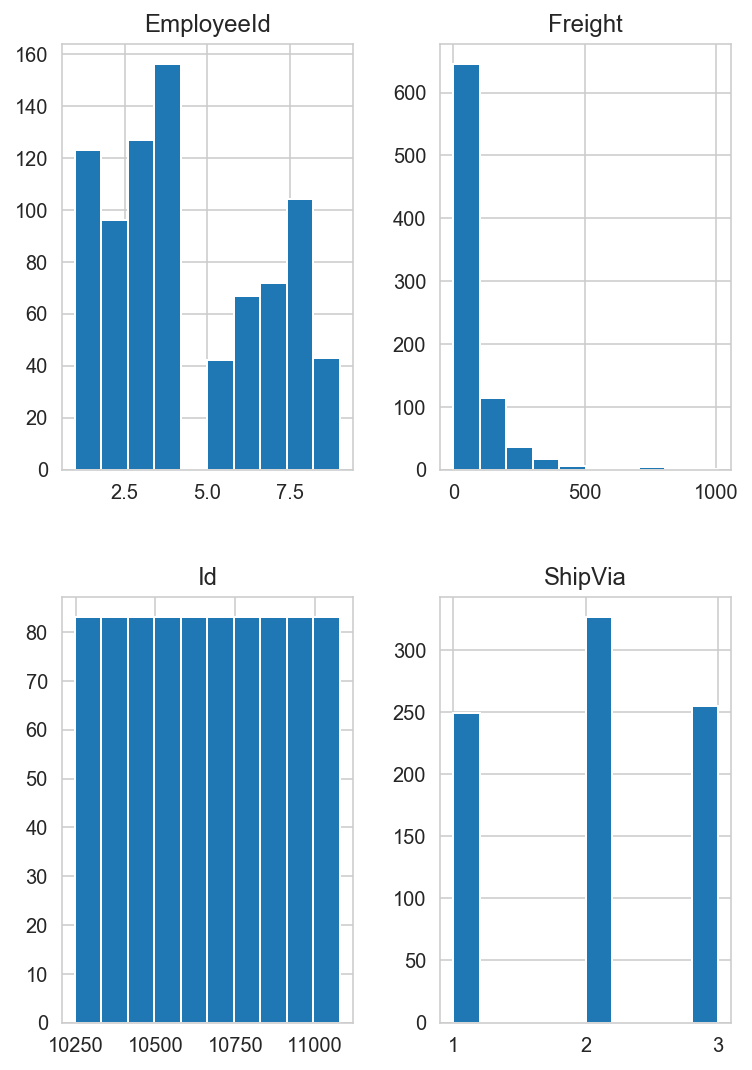

In [20]:
display(order_df.dtypes)
ax = order_df.hist(figsize = (6,9))

In [21]:
# Our goal is a marketing report rather than an operations report,  so removing less relevent columns
order_df.drop(columns = ['ShipAddress', 'ShipCity', 'ShipPostalCode', 'Freight' ], inplace=True)

In [22]:
order_df['CustomerId'].unique()


array(['VINET', 'TOMSP', 'HANAR', 'VICTE', 'SUPRD', 'CHOPS', 'RICSU',
       'WELLI', 'HILAA', 'ERNSH', 'CENTC', 'OTTIK', 'QUEDE', 'RATTC',
       'FOLKO', 'BLONP', 'WARTH', 'FRANK', 'GROSR', 'WHITC', 'SPLIR',
       'QUICK', 'MAGAA', 'TORTU', 'MORGK', 'BERGS', 'LEHMS', 'ROMEY',
       'LILAS', 'RICAR', 'REGGC', 'BSBEV', 'COMMI', 'TRADH', 'HUNGO',
       'WANDK', 'GODOS', 'OLDWO', 'LONEP', 'ANATR', 'THEBI', 'DUMO',
       'ISLAT', 'PERIC', 'KOENE', 'SAVEA', 'BOLID', 'FURIB', 'BONAP',
       'MEREP', 'PRINI', 'SIMOB', 'FAMIA', 'LAMAI', 'PICCO', 'AROUT',
       'SEVES', 'DRACD', 'EASTC', 'ANTO', 'GALED', 'VAFFE', 'QUEE',
       'WOLZA', 'HUNGC', 'SANTG', 'BOTTM', 'LINOD', 'FOLIG', 'OCEA',
       'FRANS', 'GOURL', 'CONSH', 'RANCH', 'LAZYK', 'LAUGB', 'BLAUS',
       'NORTS', 'CACTU', 'GREAL', 'MAISD', 'TRAIH', 'LETSS', 'WILMK',
       'THECR', 'ALFKI', 'FRANR', 'SPECD', 'LACOR'], dtype=object)

#### 741 Repeat Customers

In [23]:
order_df['CustomerId'].duplicated().value_counts()


True     741
False     89
Name: CustomerId, dtype: int64

In [24]:
order_df['ShipName'].duplicated().value_counts()

True     740
False     90
Name: ShipName, dtype: int64

In [25]:
order_df['ShipCountry'].duplicated().value_counts()

True     809
False     21
Name: ShipCountry, dtype: int64

#### Top Sales People (by # of Orders)

#### Western Europe is the top region for orders (276),  North America (152), and South America (145)

#### United States and Germany are tied for the largest customer base (122)

In [26]:
for col in order_df.columns:
    print(col, "\n", order_df[col].value_counts().head(900), "\n")

Id 
 11077    1
10520    1
10530    1
10529    1
10528    1
10527    1
10526    1
10525    1
10524    1
10523    1
10522    1
10521    1
10519    1
10532    1
10518    1
10517    1
10516    1
10515    1
10514    1
10513    1
10512    1
10511    1
10510    1
10509    1
10531    1
10533    1
10507    1
10546    1
10556    1
10555    1
        ..
10772    1
10771    1
10770    1
10769    1
10791    1
10792    1
10793    1
10794    1
10815    1
10814    1
10813    1
10812    1
10811    1
10810    1
10809    1
10808    1
10807    1
10806    1
10805    1
10804    1
10803    1
10802    1
10801    1
10800    1
10799    1
10798    1
10797    1
10796    1
10795    1
10248    1
Name: Id, Length: 830, dtype: int64 

CustomerId 
 SAVEA    31
ERNSH    30
QUICK    28
FOLKO    19
HUNGO    19
BERGS    18
RATTC    18
HILAA    18
BONAP    17
LEHMS    15
WARTH    15
FRANK    15
WHITC    14
BOTTM    14
HANAR    14
LAMAI    14
LILAS    14
KOENE    14
QUEE     13
AROUT    13
MEREP    13
SUPRD    12
REGGC    

# Customer Demographic tables do not exist

In [27]:
select_data = 'SELECT * FROM CustomerDemographic;'
customer_demographic_df = load_data(select_data)

Table not loaded


In [28]:
select_data = 'SELECT * FROM CustomerCustomerDemo LIMIT 5;'
ccustomer_demo_df = load_data(select_data)



Table not loaded


# Define Functions

In [29]:
# Define generic functions to do simple statistics evaluations on 2 sample comparisons between features and metrics
# The purpose is to see if specific feature has a significant effect on a metric (example feature : discount)
# An example of the metric is "Order Quantity" or "Total Product Spend ($)"
# This is an example of univariate analysis where we check for the significance of a single feature while all other
# effects are not taken into account 

def two_sample_tests(df, feature, metric, alpha = 0.05): 
    
    ''' Run standard tests for two samples to check feature impact on outcomes / metrics
        Uses get_group to create populations
         
        Includes: 
          - Test for normality of the samples
          - Equivalence of populations 
                  - MannWhitneyU for non-normal populations
                  - 2-sided T-Tests for normal populations
          - Equivalence of the population in terms of mean and variance using Levene test
    
    Args:
        feature: these are 
        metric: these are scalar quantities that are desired results, such as order quantity, product revenue, 
            customer spend, etc.
        alpha is compared to the p-value analysed by scipy or statsmodel, and defines the percentage that the result is due to chance. 
            alpha typically = 0.05,  or 5%
              
        
    Returns:
        group1 and group2 samples for plotting
        
    Ex:
    >> no_discount, with_discount = two_sample_tests(orderdetail_df, 'Discounts', 'Quantity')
    
    '''
    group1 = df.groupby(feature).get_group(0)[metric]
    group2 = df.groupby(feature).get_group(1)[metric]
    
    print(f'Number of datapoints in group 1, no {feature} = {len(group1)}')
    print(f'Number of datapoints in group 2, with {feature} = {len(group2)}')
       
    if (len(group1) or len(group2)) > 20:
        print("Number of datapoints in the samples > 30, possible to assume normality through the Central Limit Theorem", '\n')
        print("Check the normality anyway!")    
        
# Run the test for a normal distribution        
    normtest_p1, normtest_p2 = normdist_test(group1, group2, alpha)

# Check for the equivalence of the populations in terms of mean and variance, using Levene test, 
# Then check the equivalence of the populations using either MannWhitneyU or the 2-tailed T-test

    levene_test(group1, group2, alpha)
    
    if (normtest_p1 or normtest_p2) < alpha:
        print("Need to use the non-parametric test (Mann-WhitneyU) to determine the equivalence of the populations", '\n')
        mannwhitney_test(group1, group2, alpha)
        
    else:
        print("Since the distributions are normal, proceed with the 2 sided t-test")
        t_test(group1, group2, alpha)
        
    return group1, group2


def normdist_test(group1, group2, alpha): 
    
    sns.distplot(group1)
    plt.show()
    stat_test1, normtest_p1 = stat.normaltest(group1)
    
    if normtest_p1 < alpha:
        print(f"Sample 1 P-value {np.round(normtest_p1,5)} is less than alpha {alpha}")
        print(f"Sample 1 Normality: We can reject the null hypothesis that the 1st sample comes from a normal distribution", '\n')
    else:
        print("Sample 1 Normality: We can accept the null hypothesis that the 1st sample comes from a normal distribution", '\n')
    
    sns.distplot(group2)
    plt.show()
    
    stat_test2, normtest_p2 = stat.normaltest(group2)
    
    if normtest_p2 < alpha:
        print(f"Sample 2 P-value {np.round(normtest_p1)} is less than alpha {alpha}")
        print(f"Sample 2 Normality: We can reject the null hypothesis that the 2nd sample comes from a normal distribution", '\n')
    else:
        print("Sample 2 Normality: We can accept the null hypothesis that the 2nd samples comes from a normal distribution", '\n')
        
    return normtest_p1, normtest_p2
        
def mannwhitney_test(group1, group2, alpha):
    mw_stat, mw_p = stat.mannwhitneyu(group1, group2)
    print(f"MWU: The U statistic is {np.round(mw_stat, 6)}, and the p-value is {np.round(mw_p, 6)}")
    if mw_p < alpha:
        print(f"MWU: The MannWhitneyU p-value {np.round(mw_p), 6} is less than alpha {alpha}")
        print("MannWhitneyU test: We can reject the null hypothesis that the two populations are equal",'\n')
    else:
        print("MannWhitneyU test: We can accept the null hypothesis that the two populations are equal",'\n')
        
    return 
          
# This is a Two-tailed T-Test,  whether two groups are equivalent to one another
# https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/one-tailed-test-or-two/

def t_test(group1, group2, alpha):  
    # Usage: t_test
    ttest_stat, ttest_p = stat.ttest_ind(group1, group2)
    if ttest_p < alpha:
        print(f"The 2-tailed T-test p value {np.round(ttest_p, 6)}, is less than alpha {alpha}")
        print("The 2-tailed T-test: We reject the null hypothesis that the populations have identical variance",'\n')
    else:
        print("The 2-tailed T-test: We accept the null hypthesis that the populations have identical variance",'\n')

        
    return
          
          
def levene_test(group1, group2, alpha):
    levene_stat, levene_p = stat.levene(group1, group2)
    if levene_p < alpha:
        print(f"The Levene p-value, {np.round(levene_p,6)} is less than alpha {alpha}")
        print("Levene test: We reject the null hypothesis that the variances are equal",'\n')
    else:
        print("Levene test: We accept the null hypothesis that the variances of the populations equal", '\n')
        
    return

#Plot the data, with standard error of measurement (sem)

def plot_two_sample_tests(group1, group2, feature, metric):
    '''Plot group1 and group2 next to each other along with the sem (standard error measurement)'''

    print(f'The average {metric} sold, without {feature} is {np.round(group1.mean(), 1)}')
    print(f'The average {metric} sold, with {feature} is {np.round(group2.mean(), 1)}')
    
    plt.bar(x=f'Without {feature}', height = group1.mean(), yerr = stat.sem(group1))
    plt.bar(x=f'With {feature}', height = group2.mean(), yerr = stat.sem(group2))
    
    plt.title(f'Effect of {feature} on {metric}')
    plt.ylabel(f'Average {metric}');
    
    return         


# Hypothesis 1: Does discount have a significant impact on the quantity ordered?

## The null hypothesis H0 is that the discount has no significant impact on quantity ordered.
## The alternative hypthesis H1 is that discount does have a significant impact on quantity ordered.

Number of datapoints in group 1, no Discounts = 1317
Number of datapoints in group 2, with Discounts = 838
Number of datapoints in the samples > 30, possible to assume normality through the Central Limit Theorem 

Check the normality anyway!


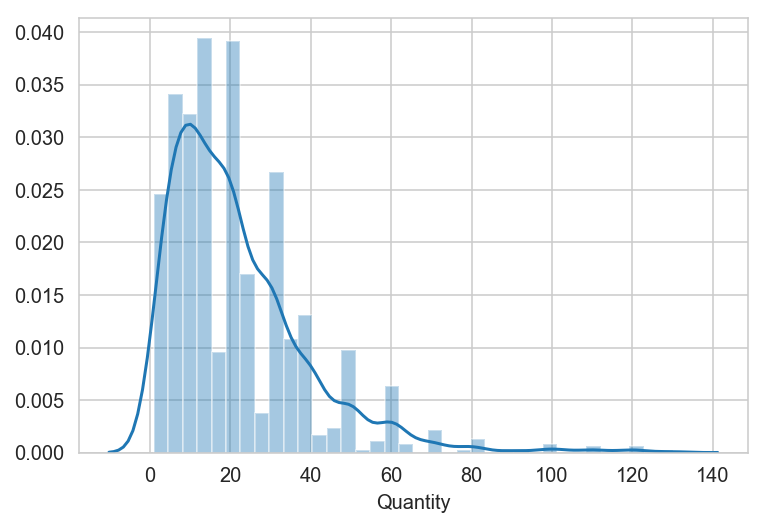

Sample 1 P-value 0.0 is less than alpha 0.05
Sample 1 Normality: We can reject the null hypothesis that the 1st sample comes from a normal distribution 



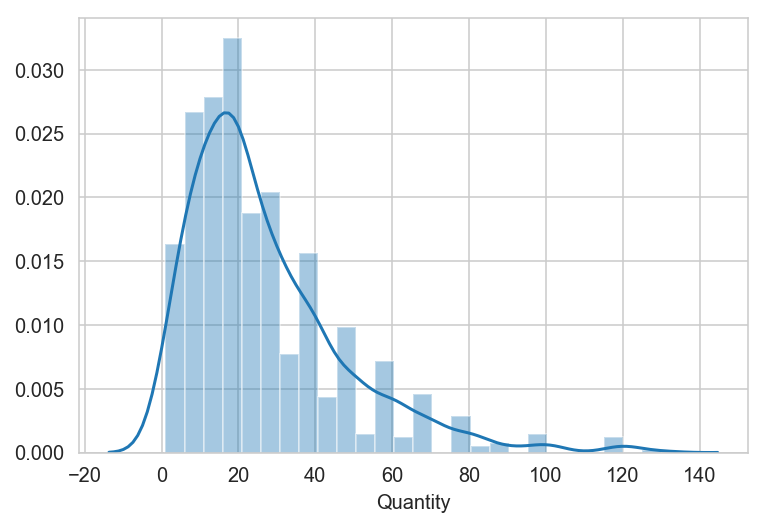

Sample 2 P-value 0.0 is less than alpha 0.05
Sample 2 Normality: We can reject the null hypothesis that the 2nd sample comes from a normal distribution 

The Levene p-value, 0.000121 is less than alpha 0.05
Levene test: We reject the null hypothesis that the variances are equal 

Need to use the non-parametric test (Mann-WhitneyU) to determine the equivalence of the populations 

MWU: The U statistic is 461541.0, and the p-value is 0.0
MWU: The MannWhitneyU p-value (0.0, 6) is less than alpha 0.05
MannWhitneyU test: We can reject the null hypothesis that the two populations are equal 

The average Order Quantity sold, without Discounts is 21.7
The average Order Quantity sold, with Discounts is 27.1


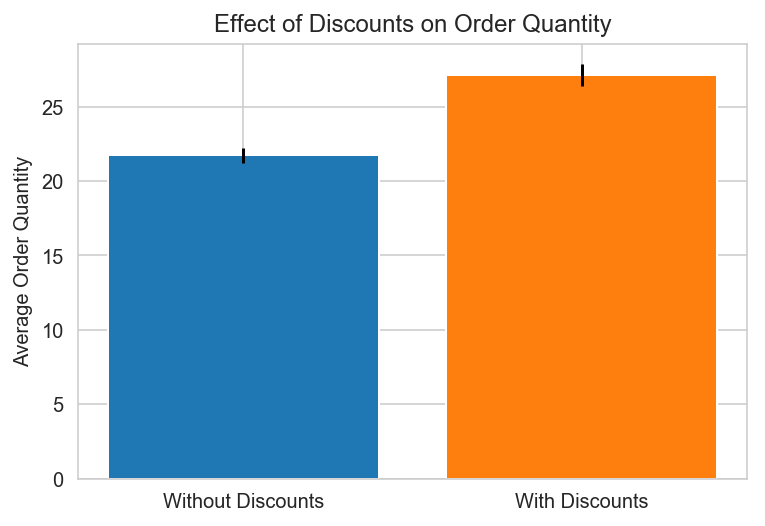

In [30]:
# Use the functions built to perform the analysis automatically

no_discount, with_discount = two_sample_tests(orderdetail_df, 'Discounts', 'Quantity')
plot_two_sample_tests(no_discount, with_discount, "Discounts", "Order Quantity")


## Calculate which Levels of discount are significant 

In [31]:
# The lack of overlap of confidence intervals agrees with the above test
# The difference in average quantity not due to random chance of 5% or more

# Now calculate which levels of discount are significant towards increasing the quantity
# Use of Tukey's test

data = orderdetail_df['Quantity'].values
labels = orderdetail_df['Discount'].values

print(data), print(labels)

import statsmodels.api as sms

model = sms.stats.multicomp.pairwise_tukeyhsd(data,labels)
display(model.summary())



[12 10  5 ...  2  4  2]
[0.   0.   0.   ... 0.01 0.   0.  ]


group1,group2,meandiff,p-adj,lower,upper,reject
0.0,0.01,-19.7153,0.9,-80.3306,40.9001,False
0.0,0.02,-19.7153,0.9,-62.593,23.1625,False
0.0,0.03,-20.0486,0.725,-55.0714,14.9742,False
0.0,0.04,-20.7153,0.9,-81.3306,39.9001,False
0.0,0.05,6.2955,0.0011,1.5381,11.053,True
0.0,0.06,-19.7153,0.9,-80.3306,40.9001,False
0.0,0.1,3.5217,0.4269,-1.3783,8.4217,False
0.0,0.15,6.6669,0.0014,1.551,11.7828,True
0.0,0.2,5.3096,0.0303,0.2508,10.3684,True
0.0,0.25,6.525,0.0023,1.3647,11.6852,True


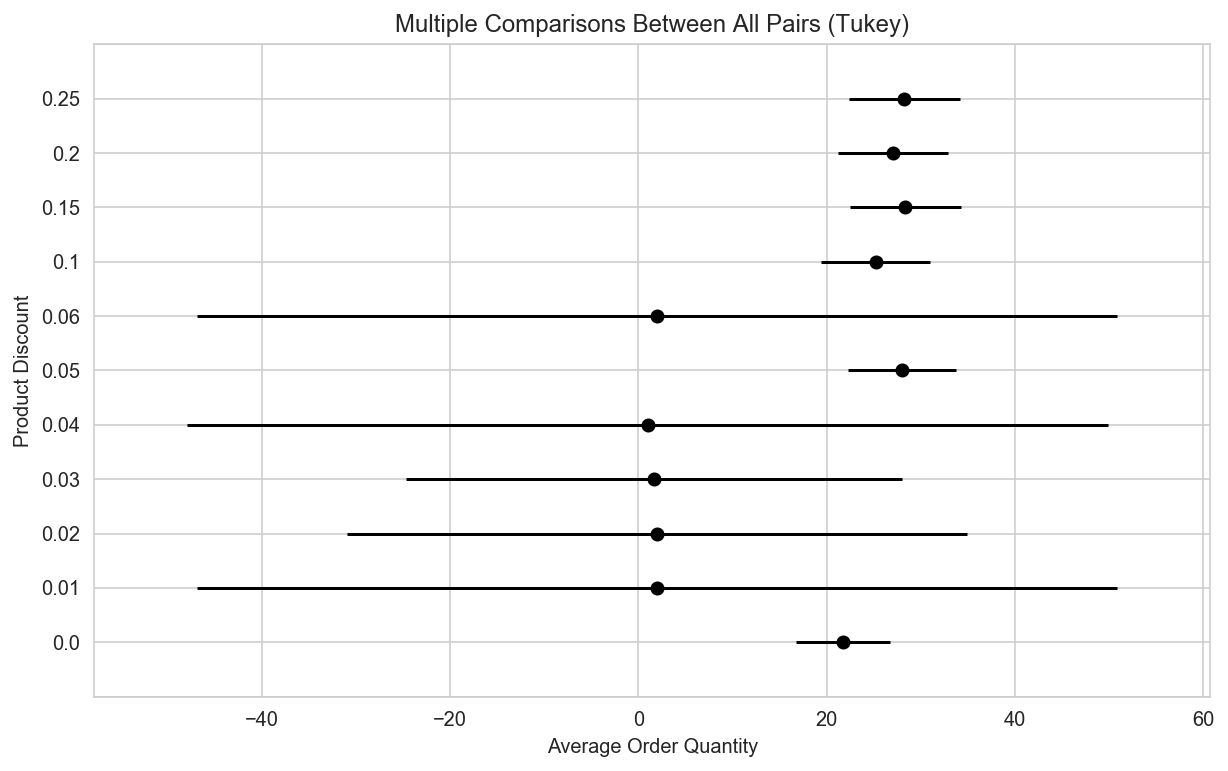

In [32]:
model.plot_simultaneous()
plt.ylabel('Product Discount')
plt.xlabel('Average Order Quantity');

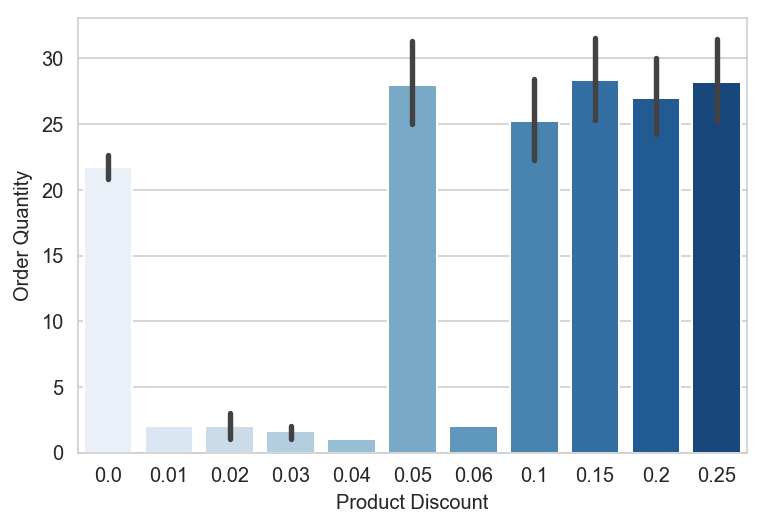

In [33]:
# After reviewing the results of the Tukey Test, it is clear that the Product discounts with significant impact 
# to order quantity,  are 5%, 10%, 15%, 20%, and 25% 

# Those Product discounts that have no impact on Quantity ordered are 1-4% and 6%
# The large error bars are due to insufficient data.

# We can replot the with Seaborn 

ax = sns.barplot(x=labels, y=data, palette ='Blues')
ax.set_ylabel('Order Quantity')
ax.set_xlabel('Product Discount');


## Hypothesis 1 Results

### Reject the null hypothesis that discounted and undiscounted products have similar quantities

### Only 5%, 15%, 20%, and 25% discounts have significant impact on the average order quantity

### Interestingly a 10% discount does not appear to have a significant effect relative to no discount


# Hypothesis 2:  Does discount impact the total amount a customer will spend (Total Product Spend) ?

## The null hypothesis H0 is that product discounts do not impact Total Product Spend

## The alternative hypothesis H1 is that product discounts do impact Total Product Spend

Number of datapoints in group 1, no Discounts = 1317
Number of datapoints in group 2, with Discounts = 838
Number of datapoints in the samples > 30, possible to assume normality through the Central Limit Theorem 

Check the normality anyway!


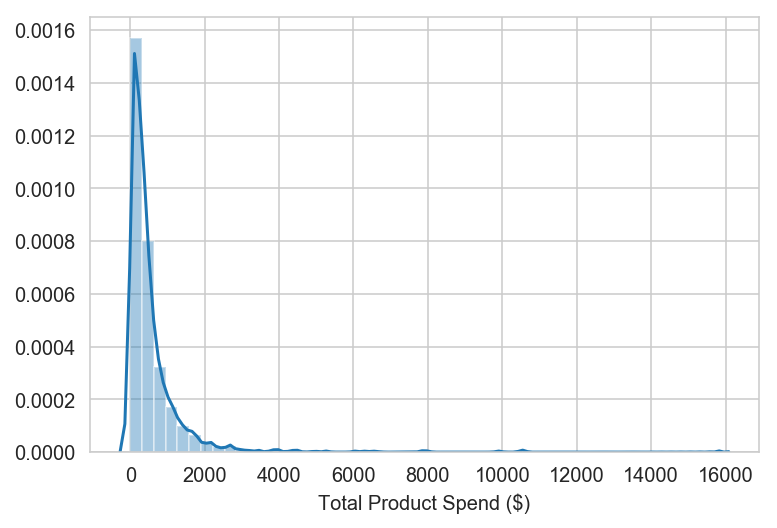

Sample 1 P-value 0.0 is less than alpha 0.05
Sample 1 Normality: We can reject the null hypothesis that the 1st sample comes from a normal distribution 



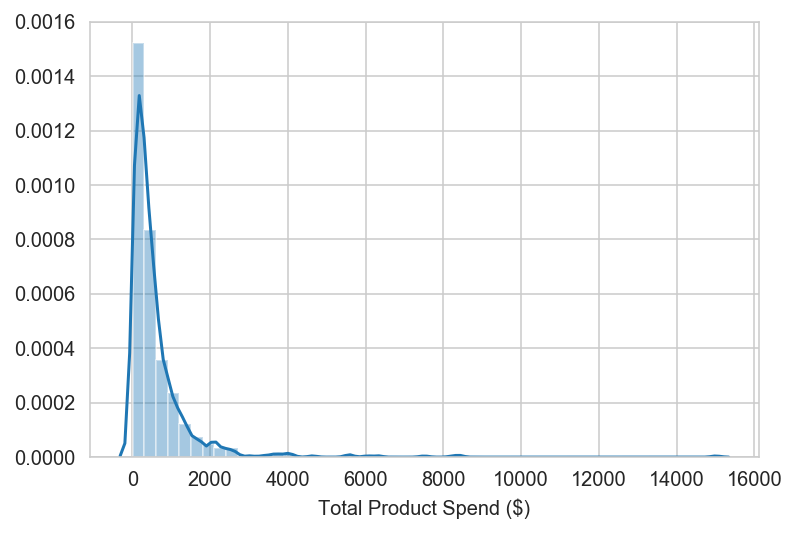

Sample 2 P-value 0.0 is less than alpha 0.05
Sample 2 Normality: We can reject the null hypothesis that the 2nd sample comes from a normal distribution 

Levene test: We accept the null hypothesis that the variances of the populations equal 

Need to use the non-parametric test (Mann-WhitneyU) to determine the equivalence of the populations 

MWU: The U statistic is 525843.5, and the p-value is 0.032525
MWU: The MannWhitneyU p-value (0.0, 6) is less than alpha 0.05
MannWhitneyU test: We can reject the null hypothesis that the two populations are equal 

The average Total Product Spend ($)  sold, without Discounts is 570.0
The average Total Product Spend ($)  sold, with Discounts is 614.7


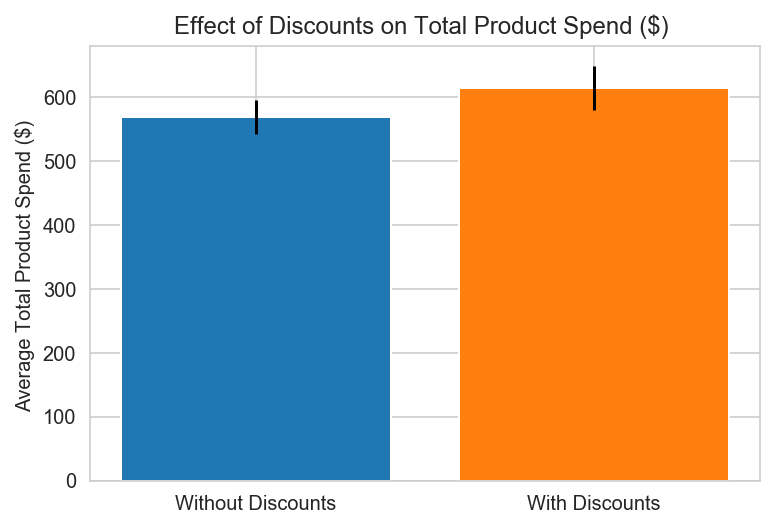

In [34]:
# Use the functions built to perform the analysis automatically

no_disc_rev_impact, with_disc_rev_impact = two_sample_tests(orderdetail_df, 'Discounts', 'Total Product Spend ($)')

plot_two_sample_tests(no_disc_rev_impact, with_disc_rev_impact, 'Discounts', 'Total Product Spend ($) ')

## The overlap of confidence intervals agrees with the above test, that the impact of discount on product revenue is significant, and with ~8% increase in average Customer Spend.

## We are able to reject the null hypothesis.  There effect of discounts on customer spending appears to be significant.

## No need to test whether specific discounts might have impact on the product revenue


In [35]:
# Tukey tests show that none of the different discounts has a meaningful impact on the Total Product Spend
data = orderdetail_df['Total Product Spend ($)'].values 
labels = orderdetail_df['Discount'].values

print(data), print(labels)

import statsmodels.api as sms

model = sms.stats.multicomp.pairwise_tukeyhsd(data,labels) 
model.summary()

[168.   98.  174.  ...  29.7  31.   26. ]
[0.   0.   0.   ... 0.01 0.   0.  ]


group1,group2,meandiff,p-adj,lower,upper,reject
0.0,0.01,-540.3065,0.9,-3662.2549,2581.6418,False
0.0,0.02,-540.1165,0.9,-2748.5047,1668.2716,False
0.0,0.03,-529.703,0.9,-2333.5278,1274.1217,False
0.0,0.04,-492.2465,0.9,-3614.1949,2629.7018,False
0.0,0.05,227.9252,0.0954,-17.1036,472.954,False
0.0,0.06,-506.0865,0.9,-3628.0349,2615.8618,False
0.0,0.1,-41.1098,0.9,-293.48,211.2604,False
0.0,0.15,-12.6424,0.9,-276.1341,250.8493,False
0.0,0.2,-16.0866,0.9,-276.6374,244.4641,False
0.0,0.25,72.4517,0.9,-193.3232,338.2266,False


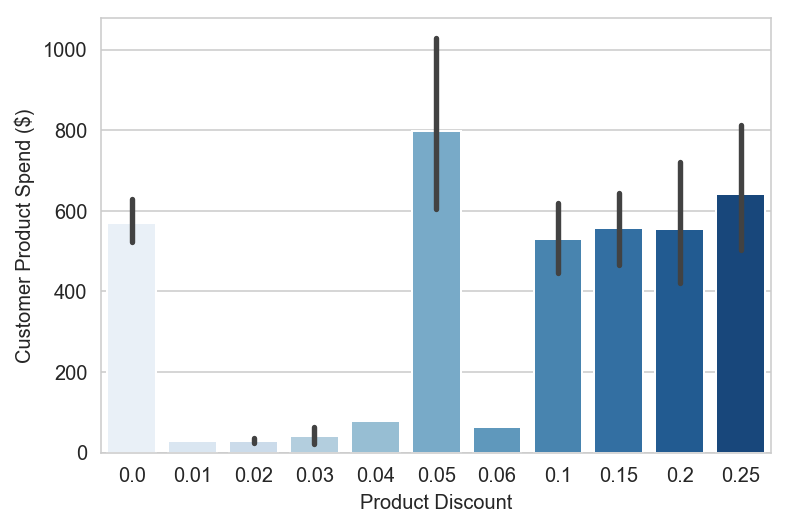

In [36]:
# Plot with Seaborn

ax = sns.barplot(x=labels, y=data, palette ='Blues')
ax.set_ylabel('Customer Product Spend ($)')
ax.set_xlabel('Product Discount');

## Summary:  5% Discount has the most significant effect on customers' product spend


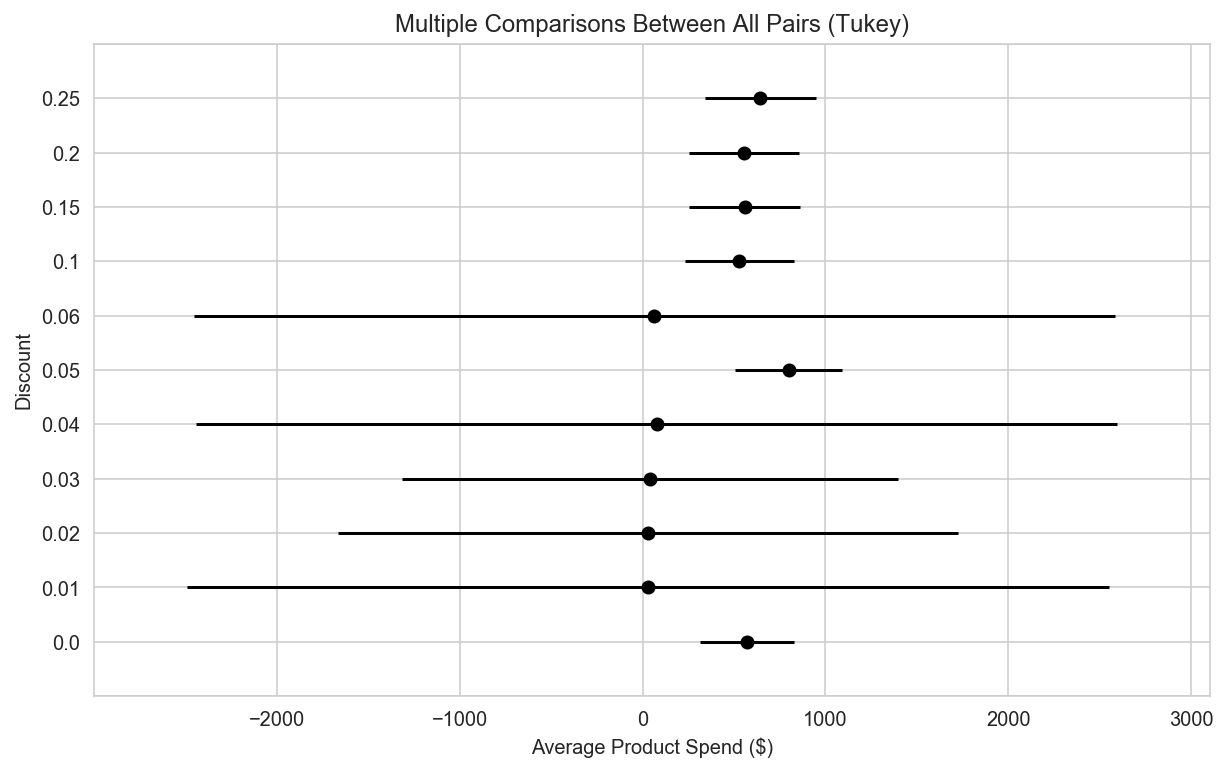

In [37]:
model.plot_simultaneous()
plt.ylabel('Discount')
plt.xlabel('Average Product Spend ($)');

# Hypothesis 3 : What is the impact of all forms of price reductions (whether MSRP reduction or product discount) on the Order Quantity and Customer Product Spend?

## Join of the orderdetail_df  and product_df to create order_product_df

#### In order to have a closer look at the "UnitPrice" columns in both tables.  Note that the UnitPrice is actually different in the OrderDetail dataframe,  relative to the Product Table

* Interpretation:  The UnitPrice in Product Table is the the Manufacturing Suggested Retail Price which is the overall baseline prices,  while the UnitPrice in the OrderDetail is the price of the item to a specific customer at a particular time. 

#### order_product_df is  used to answer hypotheses which ask whether specific pricing features such as the Manufacturers Suggested Retail Price (MSRP) or Discounts have an impact on the order quantity or a customers spend on a particular product

#### When discounts are provided, does this influence the customer to buy more of the products (i.e. increase the order quantity) or to actually spend more overall in the order

## One interesting aspecting of order_product_df is that it shows that some products were sold with a price lower than the MSRP (Manufacturers Suggested Retail Price),  and some had additional discounts

## Analyse the Impact of each of these pricing strategies towards Order Quantity and Customer Product Spend 

#### Create new categorical column "MSRP"  (1 = MSRP price, 0 = MSRP discounted)
#### Create new categorical column "net_discount" (1 = has some kind of discount, 0 = no discounts)
"
## The null hypothesis H0 is that price reductions -- i.e.  effect of MSRP reduction and product discount,  do not have an effect on the order quantity or customer product spend

## The alternative hypothesis H1 is that price reductions have some impact on order quantity and customer spend



In [38]:
# Use pandas to join orderdetail_df to product_df to take advantage of the added columns in orderdetails_df and because Pandas 
# creates unique column names
order_product_df = orderdetail_df.merge(product_df, left_on='ProductId', right_on='Id')

# Create a new column called "Net Discounts" and a categorical net_discount
order_product_df['Net Discounts'] = 1 - (order_product_df['Final Price'] / order_product_df['UnitPrice_y'])
order_product_df['net_discount'] = np.where(order_product_df['Net Discounts'] == 0,0,1)

# Create a new column MSRP Discount and cateogorical column that calculates the discount based on price only
# The categorical checks whether the order is using the MSRP or not
order_product_df['MSRP Discount'] = 1 - (order_product_df['UnitPrice_x'] / order_product_df['UnitPrice_y'])
order_product_df['MSRP'] = np.where(order_product_df["UnitPrice_x"] == order_product_df["UnitPrice_y"], 1, 0)

order_product_df.head(50)



,Id_x,OrderId,ProductId,UnitPrice_x,Quantity,Discount,Discounts,Final Price,Total Product Spend ($),Id_y,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice_y,Net Discounts,net_discount,MSRP Discount,MSRP
0,10248/11,10248,11,14.000,12,0.000,0,14.000,168.000,11,Queso Cabrales,5,4,1 kg pkg.,21.000,333.333m,1,333.333m,0
1,10296/11,10296,11,16.800,12,0.000,0,16.800,201.600,11,Queso Cabrales,5,4,1 kg pkg.,21.000,200.000m,1,200.000m,0
2,10327/11,10327,11,16.800,50,200.000m,1,13.440,672.000,11,Queso Cabrales,5,4,1 kg pkg.,21.000,360.000m,1,200.000m,0
3,10353/11,10353,11,16.800,12,200.000m,1,13.440,161.280,11,Queso Cabrales,5,4,1 kg pkg.,21.000,360.000m,1,200.000m,0
4,10365/11,10365,11,16.800,24,0.000,0,16.800,403.200,11,Queso Cabrales,5,4,1 kg pkg.,21.000,200.000m,1,200.000m,0
5,10407/11,10407,11,16.800,30,0.000,0,16.800,504.000,11,Queso Cabrales,5,4,1 kg pkg.,21.000,200.000m,1,200.000m,0
6,10434/11,10434,11,16.800,6,0.000,0,16.800,100.800,11,Queso Cabrales,5,4,1 kg pkg.,21.000,200.000m,1,200.000m,0
7,10442/11,10442,11,16.800,30,0.000,0,16.800,504.000,11,Queso Cabrales,5,4,1 kg pkg.,21.000,200.000m,1,200.000m,0
8,10443/11,10443,11,16.800,6,200.000m,1,13.440,80.640,11,Queso Cabrales,5,4,1 kg pkg.,21.000,360.000m,1,200.000m,0
9,10466/11,10466,11,16.800,10,0.000,0,16.800,168.000,11,Queso Cabrales,5,4,1 kg pkg.,21.000,200.000m,1,200.000m,0


## Plot to see the distributions for:
### Group 1 - MSRP no discounts
### Group 2 - MSRP with discounts
### Group 3 - MSRP reduction and no discounts
### Group 4 - Both reduced MSRP and discounts

In [39]:
no_discounts = order_product_df.loc[(order_product_df['net_discount'] == 0),:]
discount_only = order_product_df.loc[((order_product_df['MSRP'] == 1) & (order_product_df['Discounts'] ==1)), :]
MSRP_reduction = order_product_df.loc[((order_product_df['MSRP'] == 0) & (order_product_df['Discounts']==0)), :]
both_discounts = order_product_df.loc[((order_product_df['MSRP'] == 0) & (order_product_df['Discounts'] == 1)), :]

def four_samples_comparison(metric, alpha):
    '''The 4 sample comparison is similar to the 2-sample comparison
    
    Check first the normality of each sample
    And then calculating the ANOVA for comparison of the population mean and variance for equivalence
    
    Args:
        metric: these values for the results, such as order quantity, product revenue, customer spend, etc.
        alpha is compared to the p-value analysed by scipy or statsmodel, and defines the percentage that the result is due to chance. 
            alpha typically = 0.05,  or 5%
        
    Returns:
        group1, group2, group3, group4  for plotting. These groups are filtered based on the metric, and
        defined by the definition of discount types     
    '''

    group1 = no_discounts[metric]
    group2 = discount_only[metric]
    group3 = MSRP_reduction[metric]
    group4 = both_discounts[metric]
    
    print(f'The population size for group 1 is {len(group1)}, and for group 2 is {len(group2)}')
    print(f'The population size for group 3 is {len(group3)}, and for group 4 is {len(group4)}')
    
    normdist_test(group1, group2, alpha)
    normdist_test(group3, group4, alpha)
    
    fig= plt.figure(figsize=(8,4))
    plt.bar(x='MSRP, no Discount', height = group1.mean(), width = 0.4, yerr = stat.sem(group1))
    plt.bar(x='MSRP Reduced, no Discount', height = group3.mean(), width = 0.4, yerr = stat.sem(group3))    
    plt.bar(x='MSRP with Discount', height = group2.mean(), width = 0.4, yerr = stat.sem(group2))
    plt.bar(x='MSRP Reduced with Discount', height = group4.mean(), width = 0.4, yerr = stat.sem(group4))

    plt.title(f'Comparison of Impact of Discount Types on {metric}')
    plt.ylabel(f'Average {metric}');
    
    
    # Use ANOVA to check the similarity of the populations


    return group1, group2, group3, group4
    


The population size for group 1 is 915, and for group 2 is 582
The population size for group 3 is 402, and for group 4 is 256


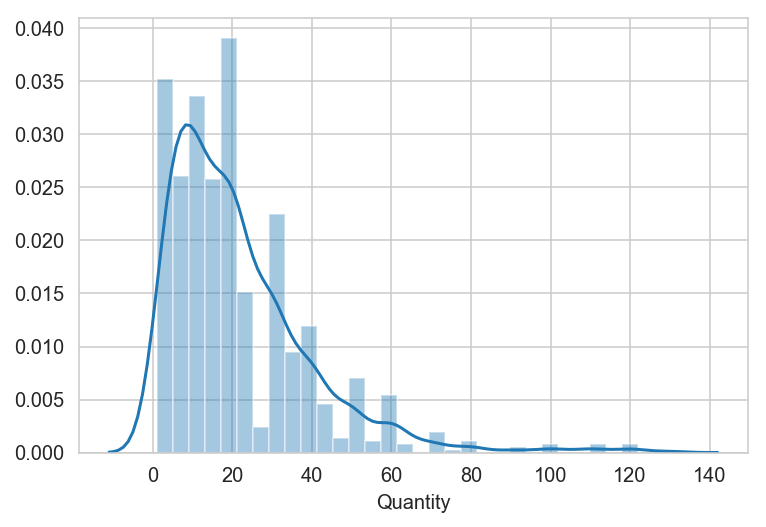

Sample 1 P-value 0.0 is less than alpha 0.05
Sample 1 Normality: We can reject the null hypothesis that the 1st sample comes from a normal distribution 



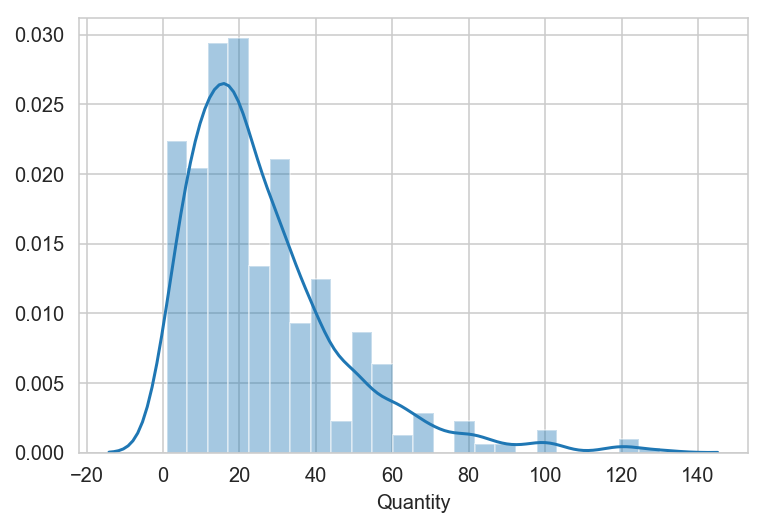

Sample 2 P-value 0.0 is less than alpha 0.05
Sample 2 Normality: We can reject the null hypothesis that the 2nd sample comes from a normal distribution 



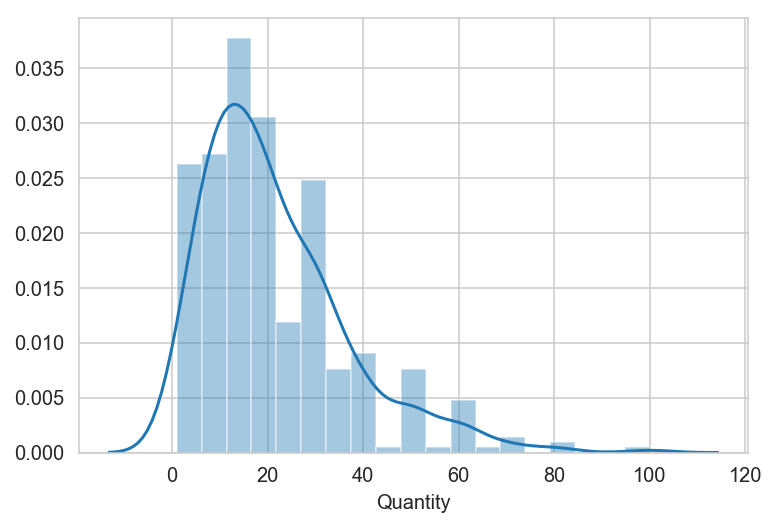

Sample 1 P-value 0.0 is less than alpha 0.05
Sample 1 Normality: We can reject the null hypothesis that the 1st sample comes from a normal distribution 



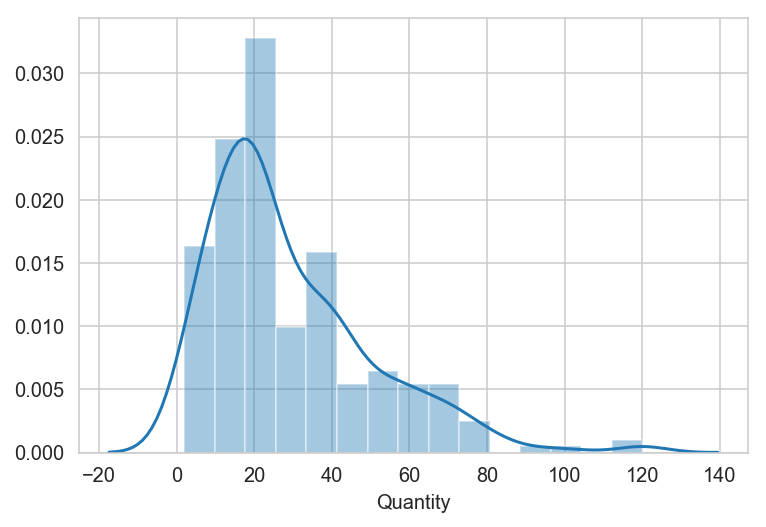

Sample 2 P-value 0.0 is less than alpha 0.05
Sample 2 Normality: We can reject the null hypothesis that the 2nd sample comes from a normal distribution 



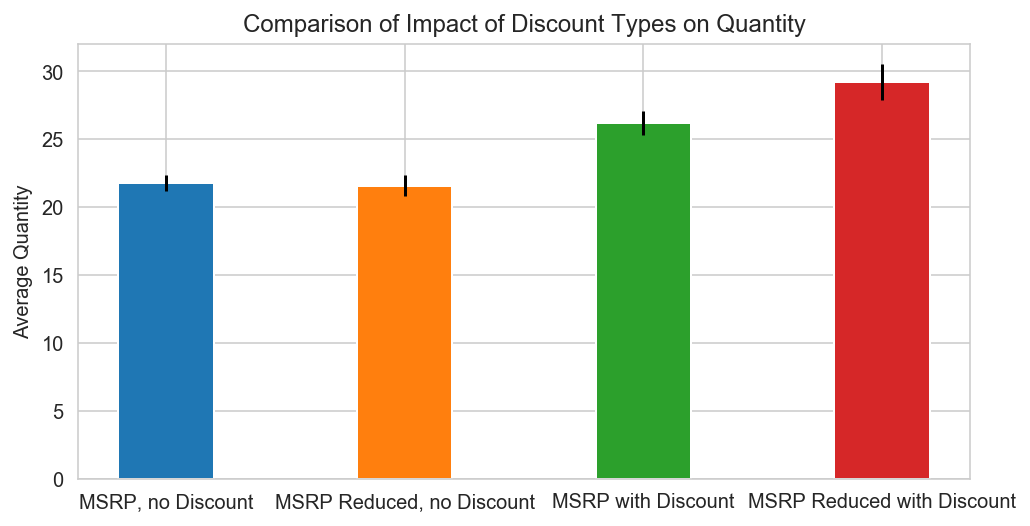

In [40]:
no_disc, other_disc, MSRP_disc, all_discs = four_samples_comparison('Quantity', alpha)

In [68]:
# Anova Test
fstat, pval = stat.f_oneway(no_disc, other_disc, MSRP_disc, all_discs)
print(f"The fstat is: {fstat}, and p-value is:  {pval}")
if pval < alpha:
    print(f"The null hypothesis is rejected that there is no difference between the groups and the means are equal")
    print("The populations and means are not equivalent")
else:
    print(f"The null hypothesis is accepted that there is no difference between the groups, and the means are equal")

The fstat is: 15.50787532818146, and p-value is:  5.56608507477635e-10
The null hypothesis is rejected that there is no difference between the groups and the means are equal
The populations and means are not equivalent


The population size for group 1 is 915, and for group 2 is 582
The population size for group 3 is 402, and for group 4 is 256


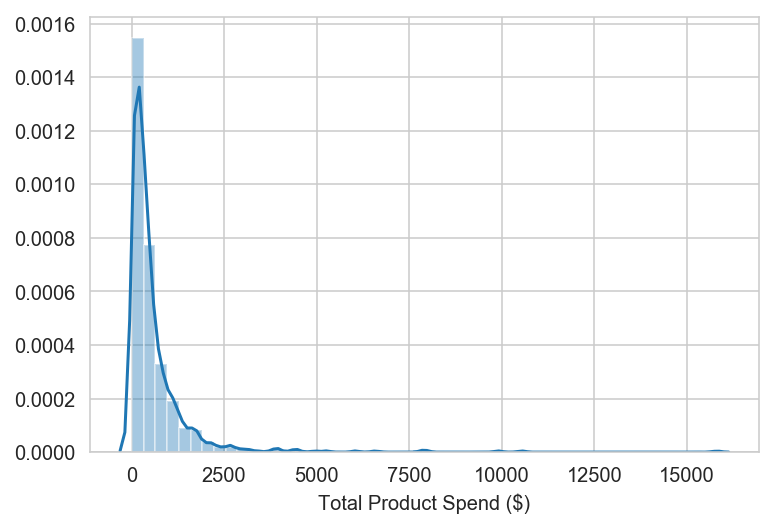

Sample 1 P-value 0.0 is less than alpha 0.05
Sample 1 Normality: We can reject the null hypothesis that the 1st sample comes from a normal distribution 



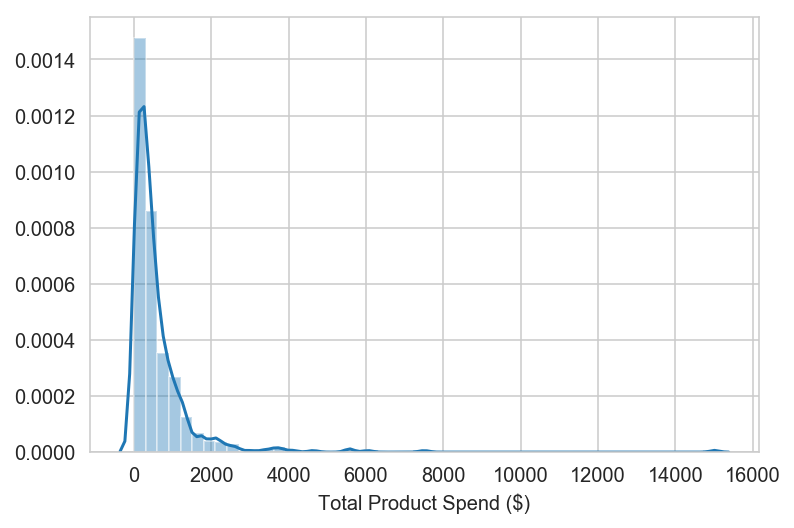

Sample 2 P-value 0.0 is less than alpha 0.05
Sample 2 Normality: We can reject the null hypothesis that the 2nd sample comes from a normal distribution 



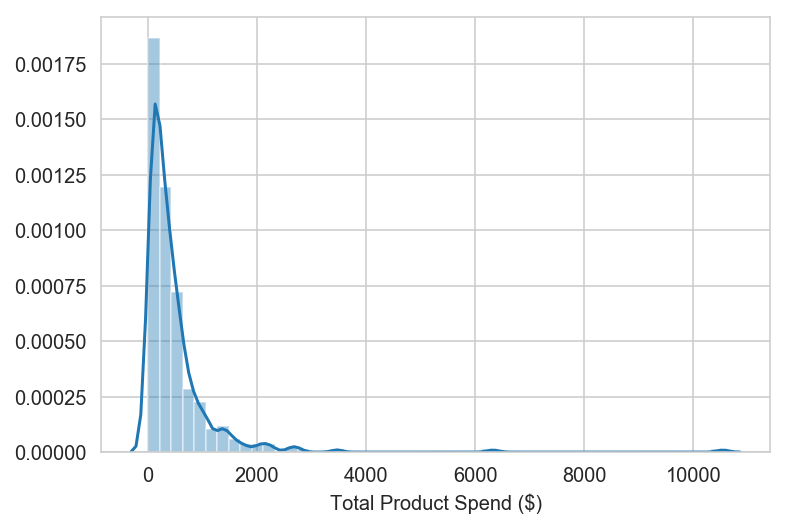

Sample 1 P-value 0.0 is less than alpha 0.05
Sample 1 Normality: We can reject the null hypothesis that the 1st sample comes from a normal distribution 



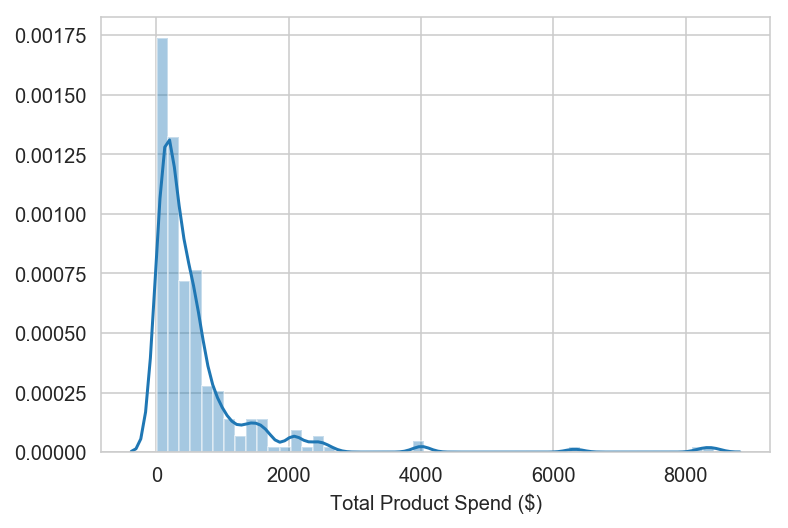

Sample 2 P-value 0.0 is less than alpha 0.05
Sample 2 Normality: We can reject the null hypothesis that the 2nd sample comes from a normal distribution 



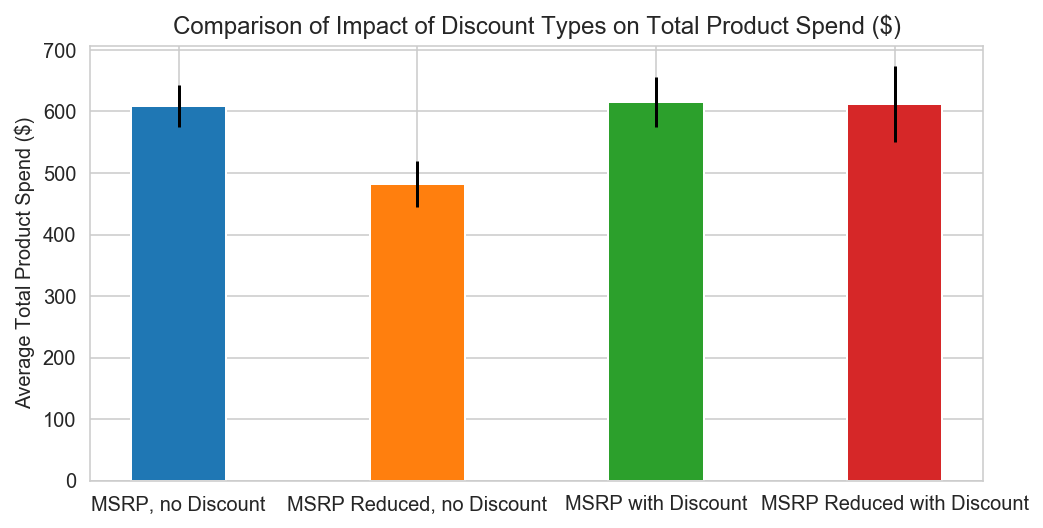

In [42]:
rev1, rev2, rev3, rev4 = four_samples_comparison('Total Product Spend ($)', alpha)

In [69]:
#  ANOVA Test

fstat, pval = stat.f_oneway(rev1, rev2, rev3, rev4)
print(f"The fstat is: {fstat}, and p-value is:  {pval}")
if pval < alpha:
    print(f"The null hypothesis is rejected that there is no difference between the groups and the means are equal")
else:
    print(f"The null hypothesis is accepted that there is no difference between the groups, and the means are equal")

The fstat is: 1.9497649299486008, and p-value is:  0.11951841800067911
The null hypothesis is accepted that there is no difference between the groups, and the means are equal


In [44]:
# Tukey test the interaction of 4 different discount types
# Help provided by James Irving

def make_msrp_col(row):
    if row['net_discount'] == 0:
        return 'MSRP, no Disc'
    elif (row['MSRP']==1) & (row['Discounts']==1):
        return "MSRP+Disc"
    elif (row['MSRP']==0) & (row['Discounts']==0):
        return "Reduced MSRP,no Disc"
    elif (row['MSRP'] == 0) & (row['Discounts'] == 1):
        return "Reduced MSRP+Disc"
    else:
        return np.nan
    

df = order_product_df.copy()    
df['MSRP groups'] = df.apply(make_msrp_col,axis=1) # default axis is 0 (columns) -- use rows

data = order_product_df['Quantity'].values
labels = df['MSRP groups']

print(data), print(labels)

import statsmodels.api as sms

model = sms.stats.multicomp.pairwise_tukeyhsd(data,labels)
display(model.summary())


[12 12 50 ... 50  6  3]
0       Reduced MSRP,no Disc
1       Reduced MSRP,no Disc
2          Reduced MSRP+Disc
3          Reduced MSRP+Disc
4       Reduced MSRP,no Disc
5       Reduced MSRP,no Disc
6       Reduced MSRP,no Disc
7       Reduced MSRP,no Disc
8          Reduced MSRP+Disc
9       Reduced MSRP,no Disc
10      Reduced MSRP,no Disc
11         Reduced MSRP+Disc
12             MSRP, no Disc
13                 MSRP+Disc
14                 MSRP+Disc
15             MSRP, no Disc
16             MSRP, no Disc
17                 MSRP+Disc
18                 MSRP+Disc
19             MSRP, no Disc
20             MSRP, no Disc
21             MSRP, no Disc
22             MSRP, no Disc
23                 MSRP+Disc
24             MSRP, no Disc
25                 MSRP+Disc
26                 MSRP+Disc
27             MSRP, no Disc
28             MSRP, no Disc
29             MSRP, no Disc
                ...         
2125               MSRP+Disc
2126    Reduced MSRP,no Disc
2127       Reduced 

group1,group2,meandiff,p-adj,lower,upper,reject
MSRP+Disc,"MSRP, no Disc",-4.4195,0.001,-6.9867,-1.8522,True
MSRP+Disc,Reduced MSRP+Disc,2.986,0.1489,-0.6453,6.6173,False
MSRP+Disc,"Reduced MSRP,no Disc",-4.6255,0.001,-7.7656,-1.4853,True
"MSRP, no Disc",Reduced MSRP+Disc,7.4055,0.001,3.9819,10.829,True
"MSRP, no Disc","Reduced MSRP,no Disc",-0.206,0.9,-3.1033,2.6913,False
Reduced MSRP+Disc,"Reduced MSRP,no Disc",-7.6115,0.001,-11.4832,-3.7397,True


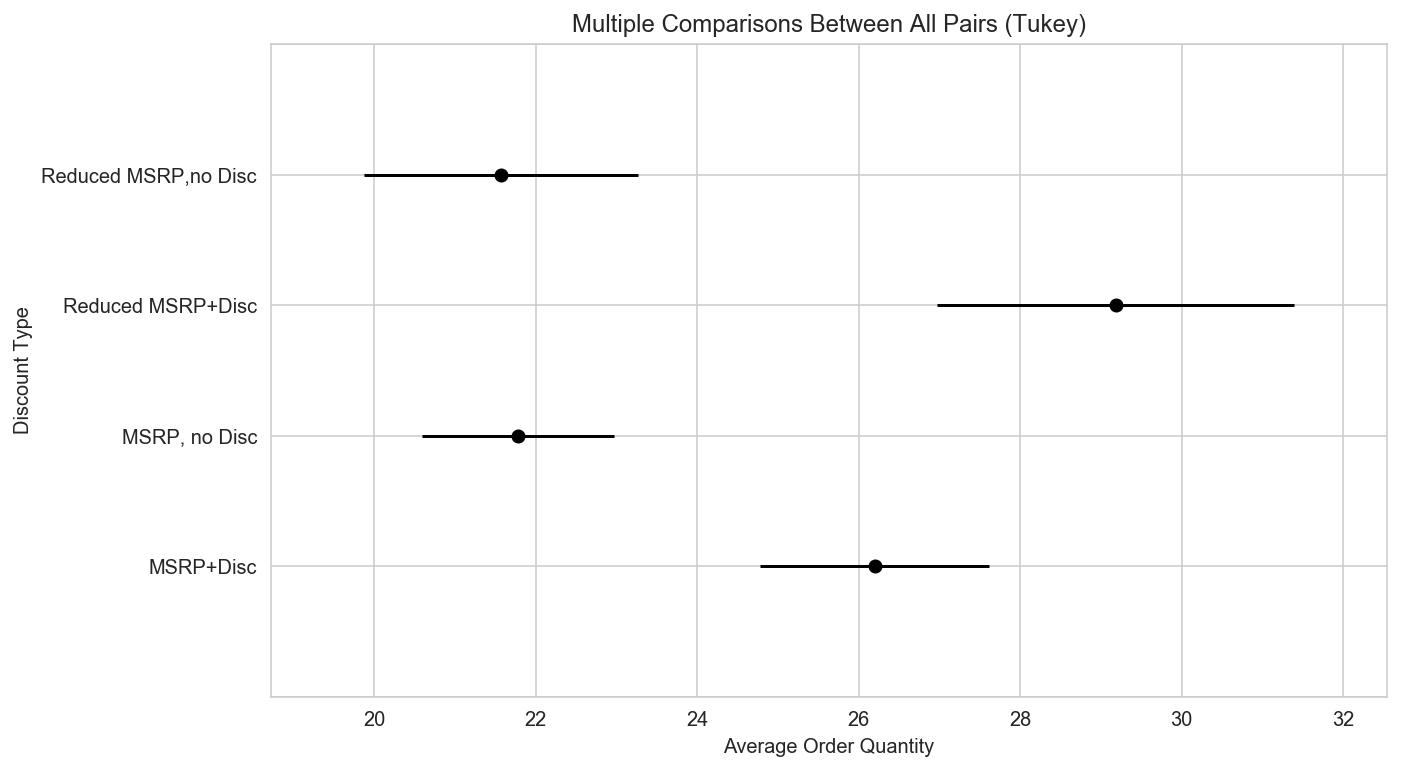

In [45]:
model.plot_simultaneous()
plt.ylabel('Discount Type')
plt.xlabel('Average Order Quantity');

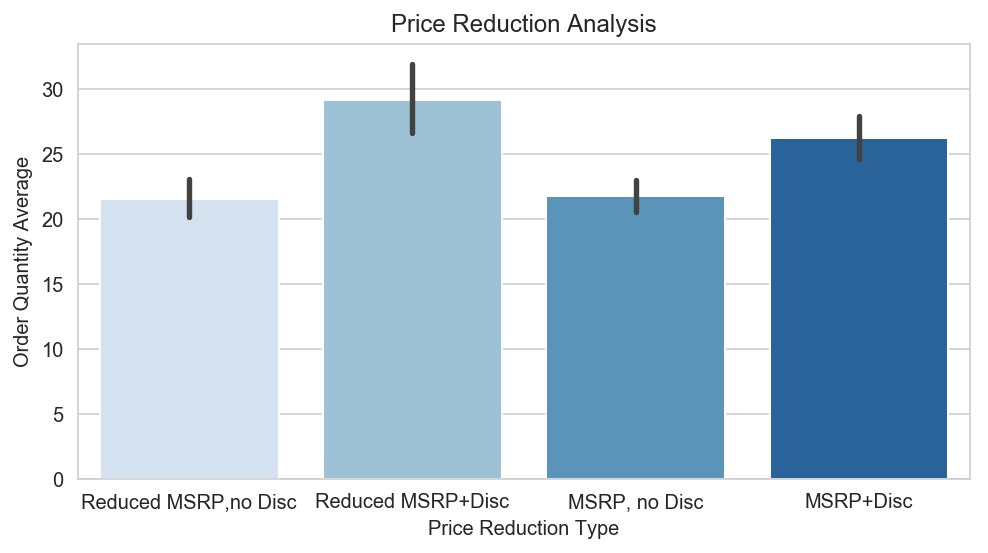

In [46]:
fig= plt.figure(figsize=(8,4))
ax = sns.barplot(x=labels, y=data, palette ='Blues')
ax.set_ylabel('Order Quantity Average')
ax.set_xlabel('Price Reduction Type')
ax.set_title('Price Reduction Analysis');

In [47]:
data = order_product_df['Total Product Spend ($)'].values
model = sms.stats.multicomp.pairwise_tukeyhsd(data,labels)
display(model.summary())


group1,group2,meandiff,p-adj,lower,upper,reject
MSRP+Disc,"MSRP, no Disc",-7.4143,0.9,-139.4482,124.6196,False
MSRP+Disc,Reduced MSRP+Disc,-4.363,0.9,-191.1244,182.3984,False
MSRP+Disc,"Reduced MSRP,no Disc",-133.8174,0.1438,-295.3164,27.6815,False
"MSRP, no Disc",Reduced MSRP+Disc,3.0513,0.9,-173.0225,179.125,False
"MSRP, no Disc","Reduced MSRP,no Disc",-126.4032,0.1287,-275.4134,22.607,False
Reduced MSRP+Disc,"Reduced MSRP,no Disc",-129.4544,0.3394,-328.5798,69.6709,False


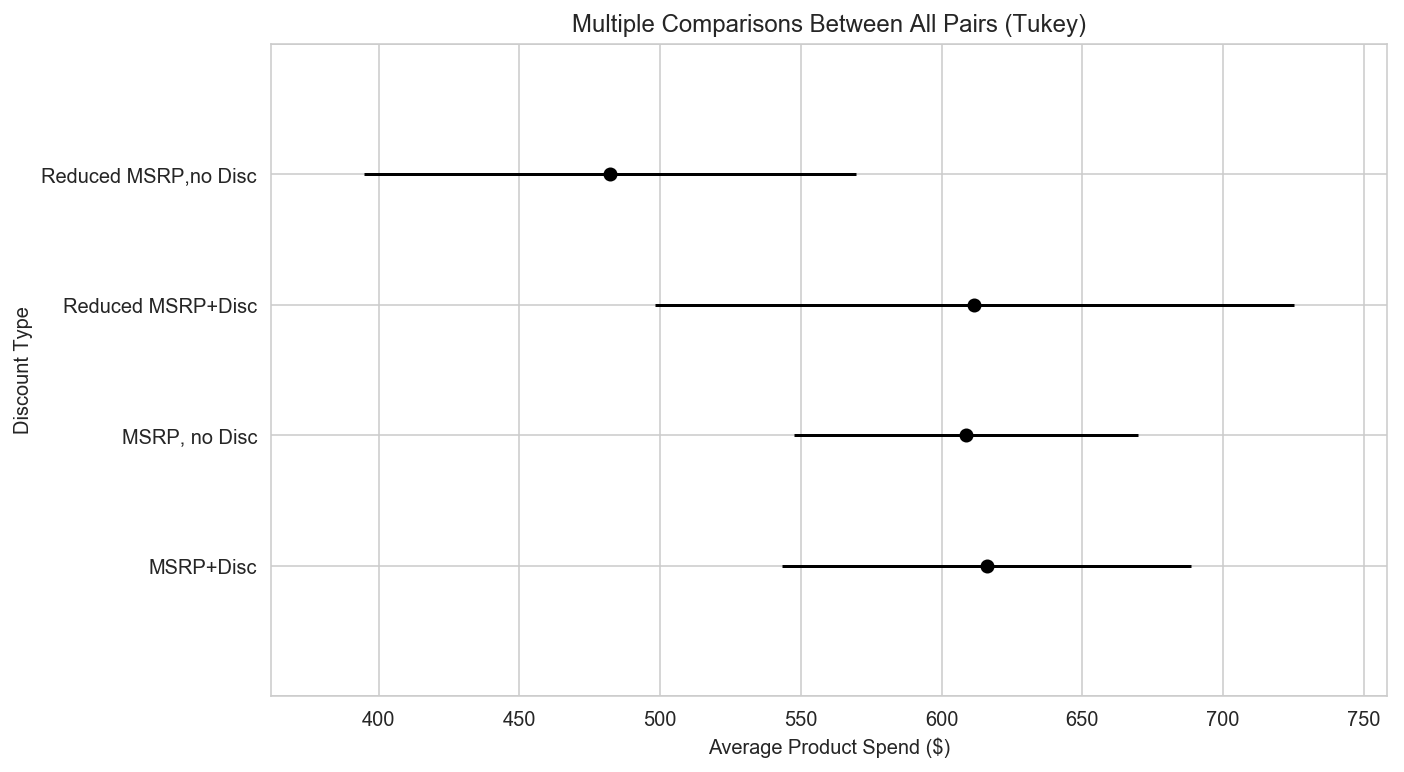

In [48]:
model.plot_simultaneous()
plt.ylabel('Discount Type')
plt.xlabel('Average Product Spend ($)');

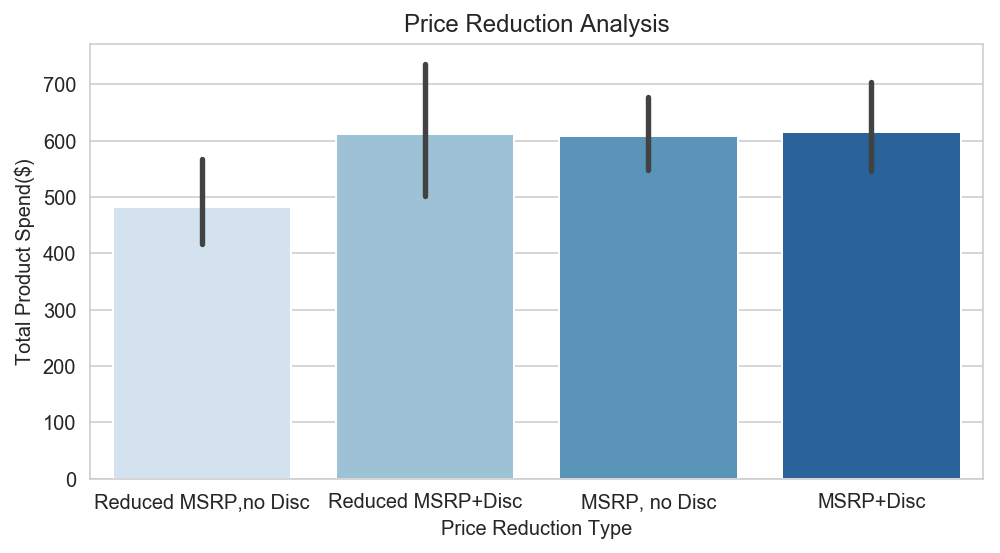

In [49]:
fig= plt.figure(figsize=(8,4))
ax = sns.barplot(x=labels, y=data, palette ='Blues')
ax.set_ylabel('Total Product Spend($)')
ax.set_xlabel('Price Reduction Type')
ax.set_title('Price Reduction Analysis');

## Result - There is a significant difference between pricing strategies.
## MSRP reduction is the least effective in generating more orders.

## Price discounts are a more effective strategies to get more orders

## However, discounting has no significant impact on improving product sales.  There was no significant difference between no discounts, and other discounts.  Interestingly,  MSRP reduction had a significant level of lower revenue, which is undesirable

## The results can be interpreted through understanding the nature of competition for consumer goods.   Competition is usually high -- the ability to differentiate consumer products through unique features or quality is limited.  Thus, it is typical to rely on differentiation based on price.

## As shown in this analysis, reducing MSRP doesn't make a lot of sense.  Neither Order Quantity nor Product Sales are improved through lowering MSRP.
    
## This analysis shows it was a good idea to move away from simply lowering the MSRP, which is a baseline price, everyday price in the mind of the consumer.   Instead a more effective way to generate more orders is to position as "temporary price reductions" which the analysis shows can generate more orders,  while potentially inceasing the Product Revenue,  which may be necessary in the face of competition.


# Investigate Pricing Timing

#### To investigate further, create a new dataframe orderproduct_df that joins the Order table to order_product_df, to look at the timing of both MSRP reductions and product discounts

In [50]:
order_product_df.head()

,Id_x,OrderId,ProductId,UnitPrice_x,Quantity,Discount,Discounts,Final Price,Total Product Spend ($),Id_y,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice_y,Net Discounts,net_discount,MSRP Discount,MSRP
0,10248/11,10248,11,14.000,12,0.000,0,14.000,168.000,11,Queso Cabrales,5,4,1 kg pkg.,21.000,333.333m,1,333.333m,0
1,10296/11,10296,11,16.800,12,0.000,0,16.800,201.600,11,Queso Cabrales,5,4,1 kg pkg.,21.000,200.000m,1,200.000m,0
2,10327/11,10327,11,16.800,50,200.000m,1,13.440,672.000,11,Queso Cabrales,5,4,1 kg pkg.,21.000,360.000m,1,200.000m,0
3,10353/11,10353,11,16.800,12,200.000m,1,13.440,161.280,11,Queso Cabrales,5,4,1 kg pkg.,21.000,360.000m,1,200.000m,0
4,10365/11,10365,11,16.800,24,0.000,0,16.800,403.200,11,Queso Cabrales,5,4,1 kg pkg.,21.000,200.000m,1,200.000m,0


In [51]:
order_df.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,ShipName,ShipRegion,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,Vins et alcools Chevalier,Western Europe,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,Toms Spezialitäten,Western Europe,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,Hanari Carnes,South America,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,Victuailles en stock,Western Europe,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,Suprêmes délices,Western Europe,Belgium


In [52]:
#Join the order_df table to the order_product_df table to get more information regarding customers and ship dates

orderproduct_df = order_product_df.merge(order_df, left_on='OrderId', right_on='Id')
orderproduct_df.shape

(2155, 29)

In [53]:

orderproduct_df['Order Date'] = pd.to_datetime(orderproduct_df['OrderDate'])
display(orderproduct_df.head())
orderproduct_df.dtypes

,Id_x,OrderId,ProductId,UnitPrice_x,Quantity,Discount,Discounts,Final Price,Total Product Spend ($),Id_y,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice_y,Net Discounts,net_discount,MSRP Discount,MSRP,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,ShipName,ShipRegion,ShipCountry,Order Date
0,10248/11,10248,11,14.000,12,0.000,0,14.000,168.000,11,Queso Cabrales,5,4,1 kg pkg.,21.000,333.333m,1,333.333m,0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,Vins et alcools Chevalier,Western Europe,France,2012-07-04
1,10248/42,10248,42,9.800,10,0.000,0,9.800,98.000,42,Singaporean Hokkien Fried Mee,20,5,32 - 1 kg pkgs.,14.000,300.000m,1,300.000m,0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,Vins et alcools Chevalier,Western Europe,France,2012-07-04
2,10248/72,10248,72,34.800,5,0.000,0,34.800,174.000,72,Mozzarella di Giovanni,14,4,24 - 200 g pkgs.,34.800,0.000,0,0.000,1,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,Vins et alcools Chevalier,Western Europe,France,2012-07-04
3,10296/11,10296,11,16.800,12,0.000,0,16.800,201.600,11,Queso Cabrales,5,4,1 kg pkg.,21.000,200.000m,1,200.000m,0,10296,LILAS,6,2012-09-03,2012-10-01,2012-09-11,1,LILA-Supermercado,South America,Venezuela,2012-09-03
4,10296/16,10296,16,13.900,30,0.000,0,13.900,417.000,16,Pavlova,7,3,32 - 500 g boxes,17.450,203.438m,1,203.438m,0,10296,LILAS,6,2012-09-03,2012-10-01,2012-09-11,1,LILA-Supermercado,South America,Venezuela,2012-09-03


Id_x                               object
OrderId                             int64
ProductId                           int64
UnitPrice_x                       float64
Quantity                            int64
Discount                          float64
Discounts                           int32
Final Price                       float64
Total Product Spend ($)           float64
Id_y                                int64
ProductName                        object
SupplierId                          int64
CategoryId                          int64
QuantityPerUnit                    object
UnitPrice_y                       float64
Net Discounts                     float64
net_discount                        int32
MSRP Discount                     float64
MSRP                                int32
Id                                  int64
CustomerId                         object
EmployeeId                          int64
OrderDate                          object
RequiredDate                      

In [54]:
orderproduct_df.set_index('Order Date', inplace = True)
orderproduct_df.index

DatetimeIndex(['2012-07-04', '2012-07-04', '2012-07-04', '2012-09-03',
               '2012-09-03', '2012-09-03', '2012-10-11', '2012-10-11',
               '2012-10-11', '2012-10-11',
               ...
               '2014-03-24', '2014-02-13', '2014-03-27', '2013-01-22',
               '2013-10-30', '2013-07-01', '2013-10-09', '2013-09-18',
               '2014-03-03', '2014-02-25'],
              dtype='datetime64[ns]', name='Order Date', length=2155, freq=None)

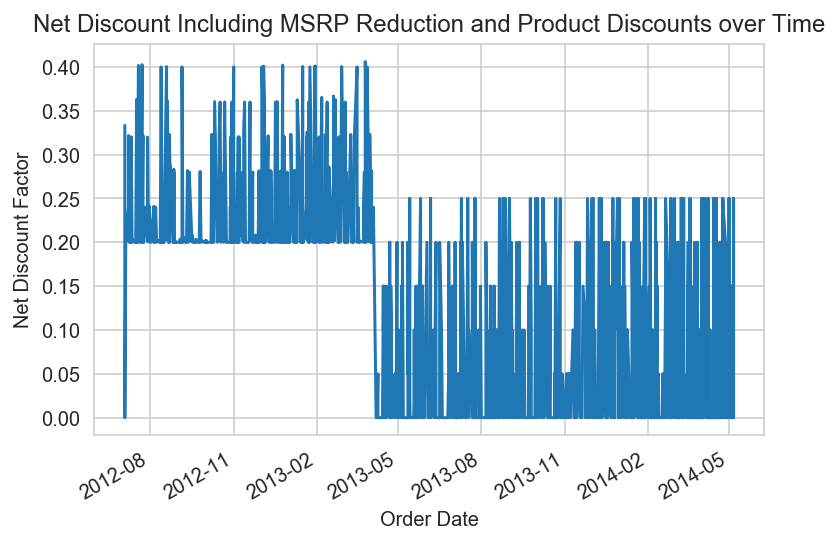

In [55]:
orderproduct_df['Net Discounts'].plot();
plt.title('Net Discount Including MSRP Reduction and Product Discounts over Time')
plt.ylabel('Net Discount Factor');

## Pricing Timing Results

### Unexpectedly,  the timing of pricing adjustments is a systematic,  not random effect

### This dataset starts with orders in August 2018,  and about 9 months later there was a sudden change in May 2013

### Looking at MSRP as a function of time explains the shift:  Before May 2013, typically 20% MSRP reductions (discounts) were given to the customer.  After May 2013,  the company changed to a "No MSRP reduction" policy

### During the same time period, product discounts up to 25% on top of the "MSRP" were also provided to the customer.    

### Thus this marketing analysis can more clearly state the impact of an MSRP reduction, versus product discounting


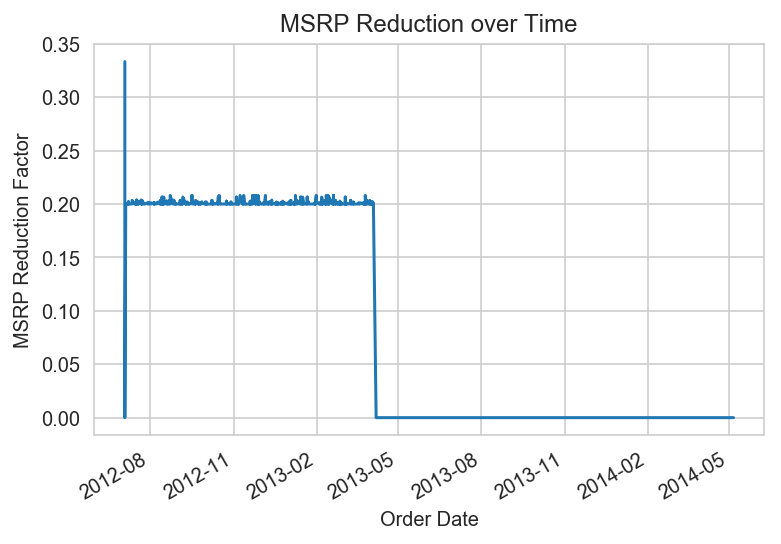

In [56]:
# Plot the MSRP over time
fig = plt.figure()
#ax1 = fig.add_subplot(211)
orderproduct_df['MSRP Discount'].plot();
plt.title('MSRP Reduction over Time')
plt.ylabel('MSRP Reduction Factor');


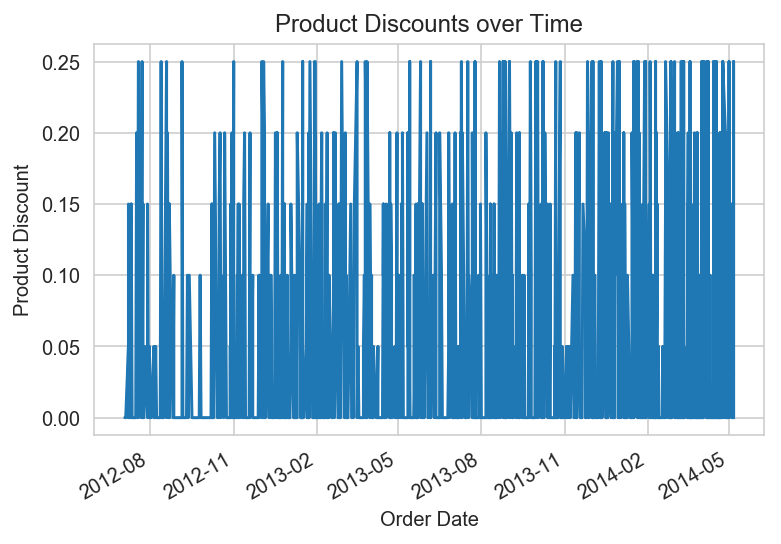

In [57]:
# Plot the product discounts provided over time

orderproduct_df['Discount'].plot();
plt.title('Product Discounts over Time')
plt.ylabel('Product Discount');

#  Hypothesis 4:  Confirmation that MSRP Reduction strategy impact on Order Quantity and Product Spend

Number of datapoints in group 1, no MSRP = 658
Number of datapoints in group 2, with MSRP = 1497
Number of datapoints in the samples > 30, possible to assume normality through the Central Limit Theorem 

Check the normality anyway!


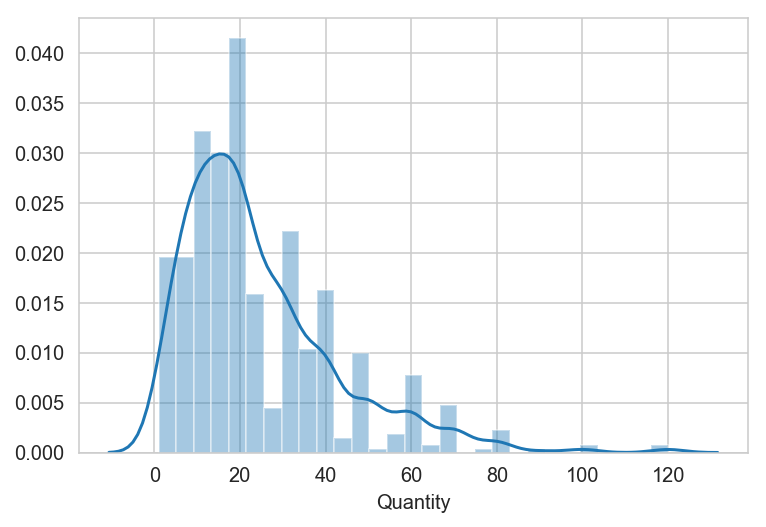

Sample 1 P-value 0.0 is less than alpha 0.05
Sample 1 Normality: We can reject the null hypothesis that the 1st sample comes from a normal distribution 



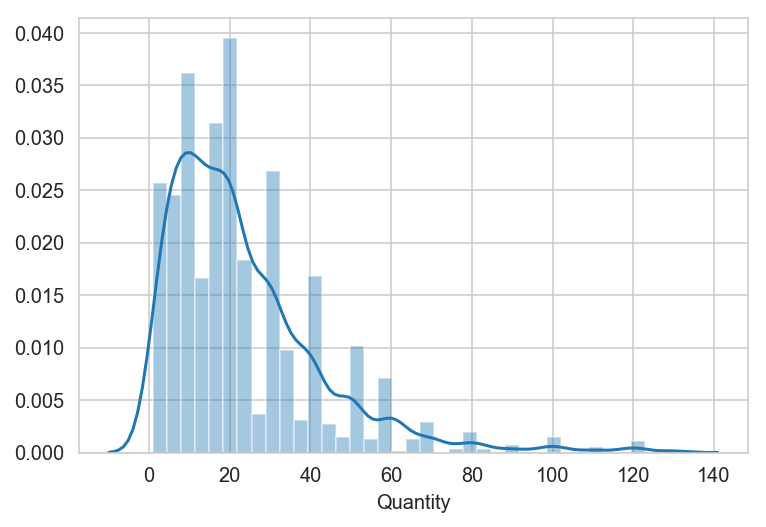

Sample 2 P-value 0.0 is less than alpha 0.05
Sample 2 Normality: We can reject the null hypothesis that the 2nd sample comes from a normal distribution 

Levene test: We accept the null hypothesis that the variances of the populations equal 

Need to use the non-parametric test (Mann-WhitneyU) to determine the equivalence of the populations 

MWU: The U statistic is 465219.5, and the p-value is 0.019905
MWU: The MannWhitneyU p-value (0.0, 6) is less than alpha 0.05
MannWhitneyU test: We can reject the null hypothesis that the two populations are equal 

The average Quantity sold, without MSRP Discount is 23.5
The average Quantity sold, with MSRP Discount is 24.5


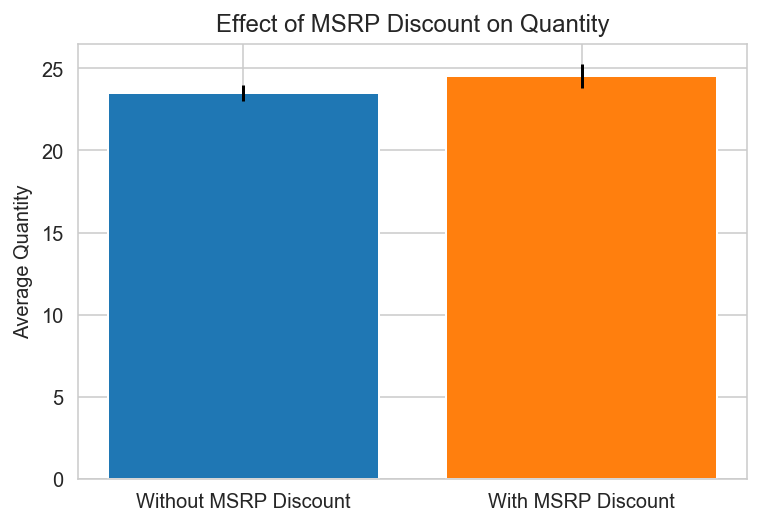

In [58]:
MSRP_reduction, no_MSRP_reduction = two_sample_tests(order_product_df, "MSRP", 'Quantity')
plot_two_sample_tests(no_MSRP_reduction, MSRP_reduction, 'MSRP Discount', 'Quantity')


Number of datapoints in group 1, no MSRP = 658
Number of datapoints in group 2, with MSRP = 1497
Number of datapoints in the samples > 30, possible to assume normality through the Central Limit Theorem 

Check the normality anyway!


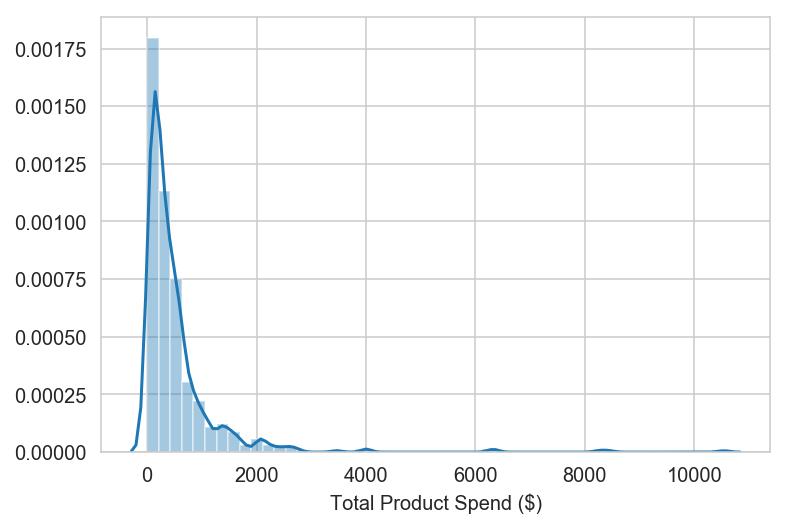

Sample 1 P-value 0.0 is less than alpha 0.05
Sample 1 Normality: We can reject the null hypothesis that the 1st sample comes from a normal distribution 



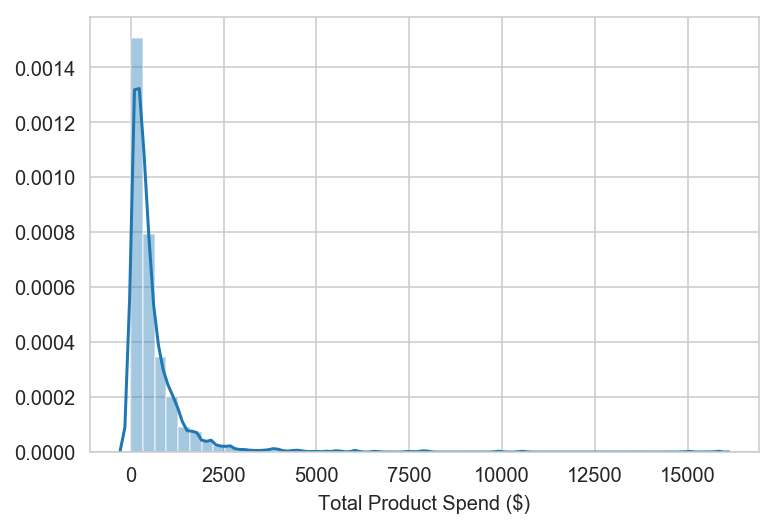

Sample 2 P-value 0.0 is less than alpha 0.05
Sample 2 Normality: We can reject the null hypothesis that the 2nd sample comes from a normal distribution 

Levene test: We accept the null hypothesis that the variances of the populations equal 

Need to use the non-parametric test (Mann-WhitneyU) to determine the equivalence of the populations 

MWU: The U statistic is 463835.0, and the p-value is 0.015554
MWU: The MannWhitneyU p-value (0.0, 6) is less than alpha 0.05
MannWhitneyU test: We can reject the null hypothesis that the two populations are equal 

The average Total Product Spend ($) sold, without MSRP Discount is 611.5
The average Total Product Spend ($) sold, with MSRP Discount is 532.6


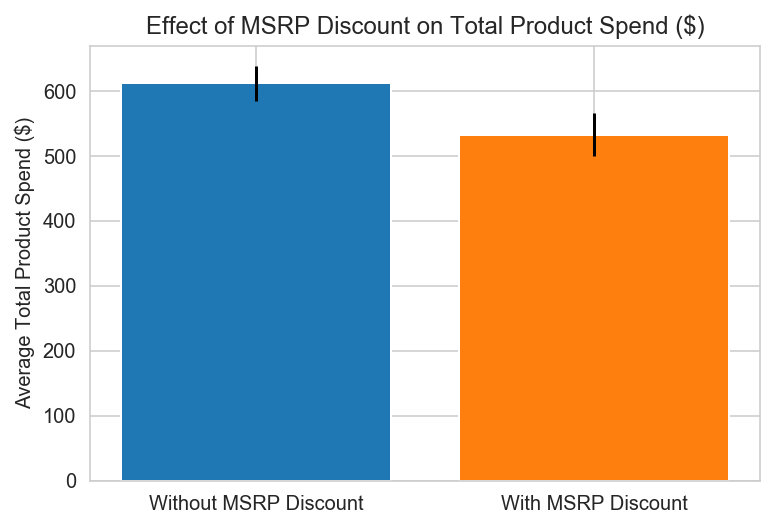

In [59]:
MSRP_reduction, no_MSRP_reduction = two_sample_tests(order_product_df, "MSRP", 'Total Product Spend ($)')
plot_two_sample_tests(no_MSRP_reduction, MSRP_reduction, 'MSRP Discount', 'Total Product Spend ($)')

# Hypothesis 5: Look at net discounts impact on order quantity and total product spend

Number of datapoints in group 1, no net_discount = 915
Number of datapoints in group 2, with net_discount = 1240
Number of datapoints in the samples > 30, possible to assume normality through the Central Limit Theorem 

Check the normality anyway!


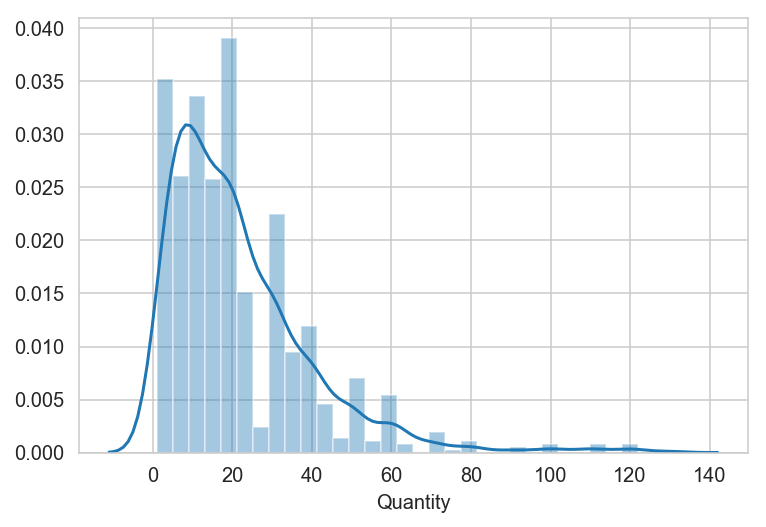

Sample 1 P-value 0.0 is less than alpha 0.05
Sample 1 Normality: We can reject the null hypothesis that the 1st sample comes from a normal distribution 



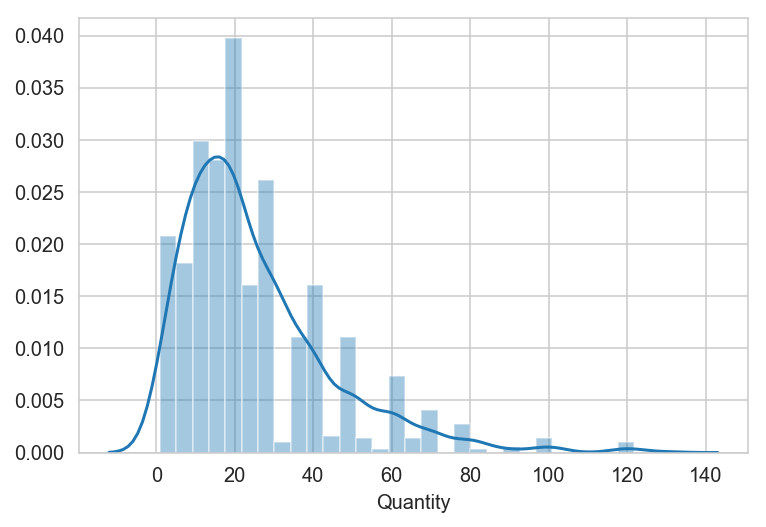

Sample 2 P-value 0.0 is less than alpha 0.05
Sample 2 Normality: We can reject the null hypothesis that the 2nd sample comes from a normal distribution 

Levene test: We accept the null hypothesis that the variances of the populations equal 

Need to use the non-parametric test (Mann-WhitneyU) to determine the equivalence of the populations 

MWU: The U statistic is 494688.0, and the p-value is 0.0
MWU: The MannWhitneyU p-value (0.0, 6) is less than alpha 0.05
MannWhitneyU test: We can reject the null hypothesis that the two populations are equal 

The average Quantity sold, without Net Discounts is 21.8
The average Quantity sold, with Net Discounts is 25.3


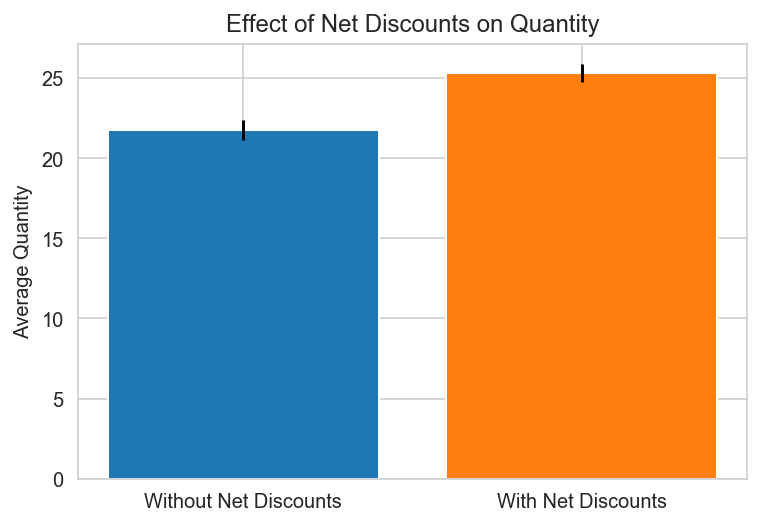

In [60]:
# Run the two_sample_tests to see if there is an Net Discount impact on Order Quantity or Total Product Spend ($)
no_discount, with_net_discount = two_sample_tests(order_product_df, 'net_discount', 'Quantity')

plot_two_sample_tests(no_discount, with_net_discount, 'Net Discounts', 'Quantity')

## With Net discounts the Total Product Spend is statistically equal to the Total product spend (revenue) without discounts.

## In other words,  it doesn't really pay off to offer discounts.

## However, this analysis does not reflect the entire picture. In the face of competitors who may offer discounts,  Northwind may have to offer discounts, simply to keep up the appearances with competitors, in order to get orders in the first place, without any increase in revenue

Number of datapoints in group 1, no net_discount = 915
Number of datapoints in group 2, with net_discount = 1240
Number of datapoints in the samples > 30, possible to assume normality through the Central Limit Theorem 

Check the normality anyway!


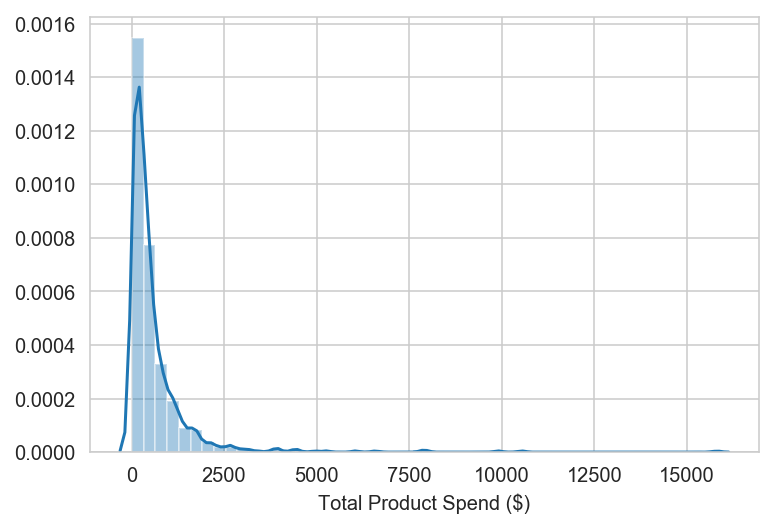

Sample 1 P-value 0.0 is less than alpha 0.05
Sample 1 Normality: We can reject the null hypothesis that the 1st sample comes from a normal distribution 



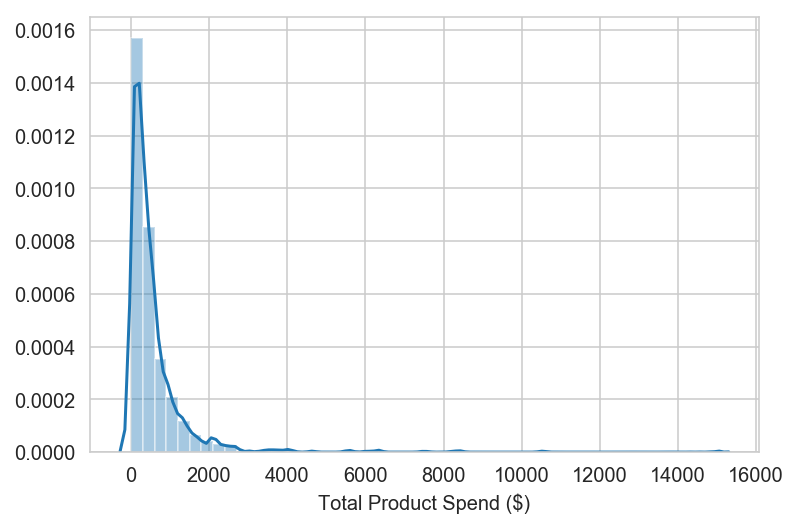

Sample 2 P-value 0.0 is less than alpha 0.05
Sample 2 Normality: We can reject the null hypothesis that the 2nd sample comes from a normal distribution 

Levene test: We accept the null hypothesis that the variances of the populations equal 

Need to use the non-parametric test (Mann-WhitneyU) to determine the equivalence of the populations 

MWU: The U statistic is 564123.5, and the p-value is 0.411983
MannWhitneyU test: We can accept the null hypothesis that the two populations are equal 

The average Total Product Spend ($) sold, without Net Discounts is 608.6
The average Total Product Spend ($) sold, with Net Discounts is 571.7


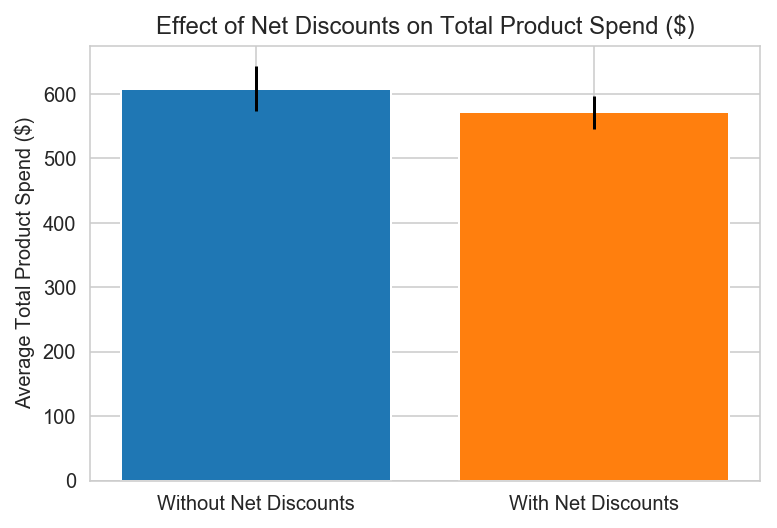

In [61]:
#Check the effect of Net Discounts on Total Product Spend
no_discount, with_net_discount = two_sample_tests(order_product_df, 'net_discount', 'Total Product Spend ($)')

plot_two_sample_tests(no_discount, with_net_discount, 'Net Discounts', 'Total Product Spend ($)')

In [62]:
'''Tukey tests show that none of the different discounts has a meaningful impact on the Total Product Spend
data = orderproduct_df['Quantity'].values 
labels = orderproduct_df['Net Discounts'].values

print(data), print(labels)

import statsmodels.api as sms

model = sms.stats.multicomp.pairwise_tukeyhsd(data,labels) 
model.summary()'''

"Tukey tests show that none of the different discounts has a meaningful impact on the Total Product Spend\ndata = orderproduct_df['Quantity'].values \nlabels = orderproduct_df['Net Discounts'].values\n\nprint(data), print(labels)\n\nimport statsmodels.api as sms\n\nmodel = sms.stats.multicomp.pairwise_tukeyhsd(data,labels) \nmodel.summary()"

In [63]:
'''model.plot_simultaneous()
plt.ylabel('Net Discounts')
plt.xlabel('Quantity');'''

"model.plot_simultaneous()\nplt.ylabel('Net Discounts')\nplt.xlabel('Quantity');"